<h1>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"><span style='color:#CDA63A'>|</span> Problem </div></h1>
Customer churn is a critical issue faced by many businesses, including our company. We aim to identify customers who are likely to churn in the near future to proactively take steps to retain them. Our dataset contains historical data on customer behavior and demographics, including their usage patterns, payment history, customer service interactions, and other relevant features. We seek to build a machine learning model that can accurately predict which customers are most likely to churn based on these factors, and use this information to take targeted actions to retain our customers and improve our business performance

<h1>
<div style="padding:20px;
            color:white;
            margin:10px;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">
    <span style='color:#CDA63A'>|</span> Data Collection </div></h1> 
The data for this project was sourced from Telco Customer Churn Dataset on Kaggle by BLASTCHAR. 
<a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn"> Link </a>


The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, RFECV


from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
from imblearn.over_sampling import SMOTE



import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

sns.set_palette(sns.color_palette("pastel"))

SEED = 34

In [2]:
df = pd.read_csv("data.csv")
df.shape

(7043, 21)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.SeniorCitizen = np.where(df.SeniorCitizen == 1, 'Yes', 'No')

In [6]:
target = ["Churn"]
services = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
c_demo  = ["gender", "age", "SeniorCitizen", "Partner", "Dependents"]
c_acc = list(set(df.columns) - set(services) - set(c_demo) - set(target))

<h1>
<div style="padding:20px;
            color:white;
            margin:10px;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">
<span style='color:#CDA63A'>|</span> Data Cleaning </div></h1>
<ul>
<li>Check number of classes for each categorical variable</li>
<li>Handle missing data</li>
<li>Remove outliers</li>
</ul>


In [7]:
for i in df.columns:
    if df[i].dtype == "object":
        n_c = df[i].nunique()
        print(f"{i}: {n_c}")
        print(df[i].unique())

        print("-"*40)

customerID: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------
gender: 2
['Female' 'Male']
----------------------------------------
SeniorCitizen: 2
['No' 'Yes']
----------------------------------------
Partner: 2
['Yes' 'No']
----------------------------------------
Dependents: 2
['No' 'Yes']
----------------------------------------
PhoneService: 2
['No' 'Yes']
----------------------------------------
MultipleLines: 3
['No phone service' 'No' 'Yes']
----------------------------------------
InternetService: 3
['DSL' 'Fiber optic' 'No']
----------------------------------------
OnlineSecurity: 3
['No' 'Yes' 'No internet service']
----------------------------------------
OnlineBackup: 3
['Yes' 'No' 'No internet service']
----------------------------------------
DeviceProtection: 3
['No' 'Yes' 'No internet service']
----------------------------------------
TechSupport: 3
['No' 'Yes' 'No internet service']
-----

Observations:
- The features that contain 'No internet service' and 'No phone service' may need to be changed to 'No' because 'InternetService' feature already contain it
- The data type of TotalCharges is incorrect.
- Payment methods 'Bank transfer (automatic)' and 'Credit card (automatic)' could be grouped together.

In [8]:
def clean_feature_names(data):
    # Count whitespace in feature names
    whitespace_counts = {col: col.count(" ") for col in data.columns}

    # Replace whitespace with underscores in feature names
    data.columns = [col.replace(" ", "_") for col in data.columns]

    # Print whitespace counts
    whitespace_total = sum(whitespace_counts.values())
    print(f"Total whitespace characters found: {whitespace_total}")
    print("Whitespace counts by feature:")
    print(pd.Series(whitespace_counts))

    return data
clean_feature_names(df)

Total whitespace characters found: 0
Whitespace counts by feature:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
df = df.replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

## <span style='color:#E1B12D'>Missing Data</span>

In [10]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There is 11 Null values, since they are only small amount just drop first

In [11]:
df.dropna(inplace=True)

## <span style='color:#E1B12D'>Duplicate Data</span>

In [12]:
print(f"duplicate: {df.duplicated().sum()}")

duplicate: 0


In [13]:
df.drop("customerID", axis=1, inplace=True) #drop unuse column

## <span style='color:#E1B12D'>Outliers </span>

In [14]:
cate = [c for c in df.columns if df[c].dtype == 'object']
conti = [c for c in df.columns if df[c].dtype != 'object']

In [15]:
# Remove outliners
def remove_outliers(data, categorical_columns, threshold=3):
    cleaned_data = data.copy()
    before = cleaned_data.shape[0]

    continuous_data = cleaned_data.drop(categorical_columns, axis=1)
    z = (continuous_data - continuous_data.mean()) / continuous_data.std()

    mask = (z.abs() > threshold).any(axis=1)

    cleaned_data = cleaned_data[~mask]
    after = cleaned_data.shape[0]
    print("Amount of outliers: ", before-after)
    return cleaned_data

df = remove_outliers(df, cate)

Amount of outliers:  0


<a id="2"></a>
<h1>
<div style="padding:20px;
            color:white;
            margin:10px;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">
    <span style='color:#CDA63A'>|</span> EDA </div></h1> 

In [16]:
cate.remove("Churn")

In [17]:
for c in cate:
    print(df[c].unique())

['Female' 'Male']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [18]:
len(df[df["gender"] == "Female"])

3483

In [19]:
c = 2
1, 2, 3, 4
1, 2
+1 *2

2

## <span style='color:#E1B12D'>Categorical Variables</span>

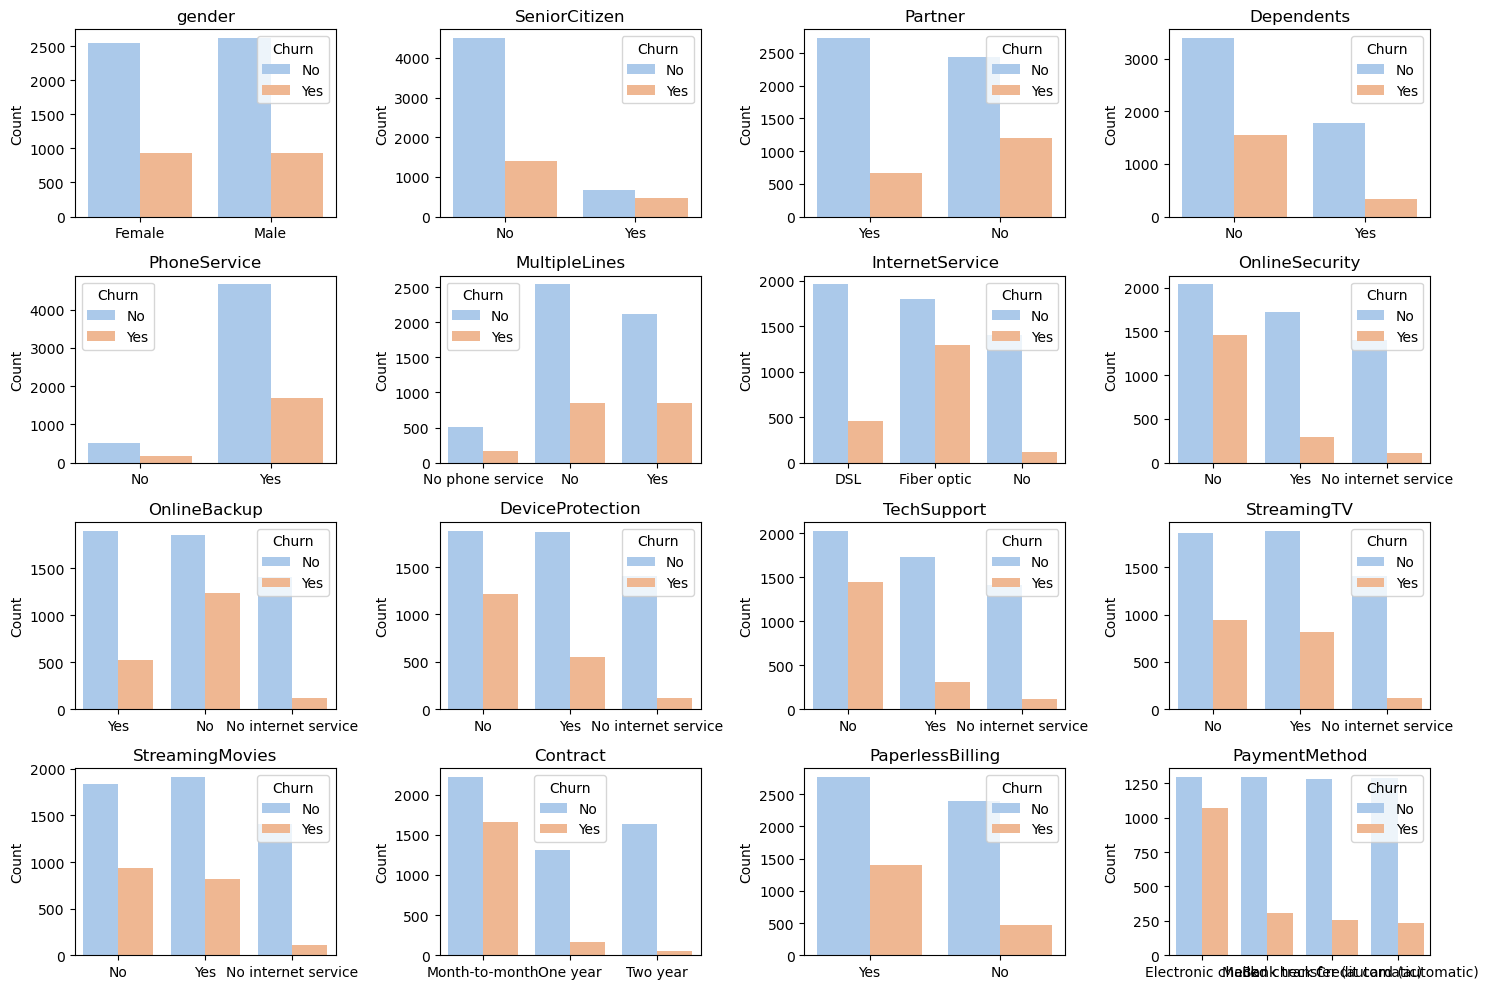

In [20]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))
axes = axes.flatten()

for i, c in enumerate(cate):
    sns.countplot(x=c, ax=axes[i], hue="Churn", data=df)
    axes[i].set_title(c)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


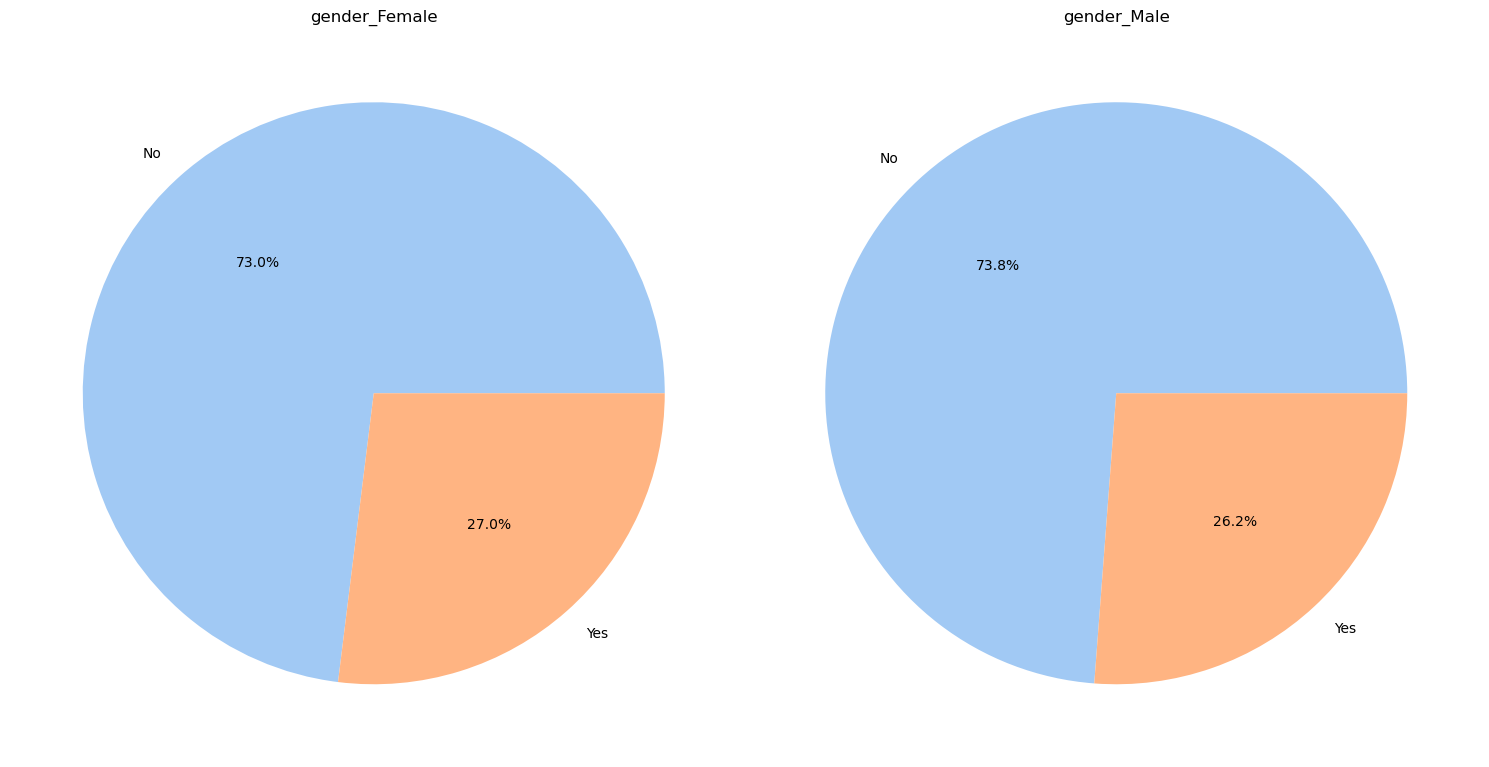

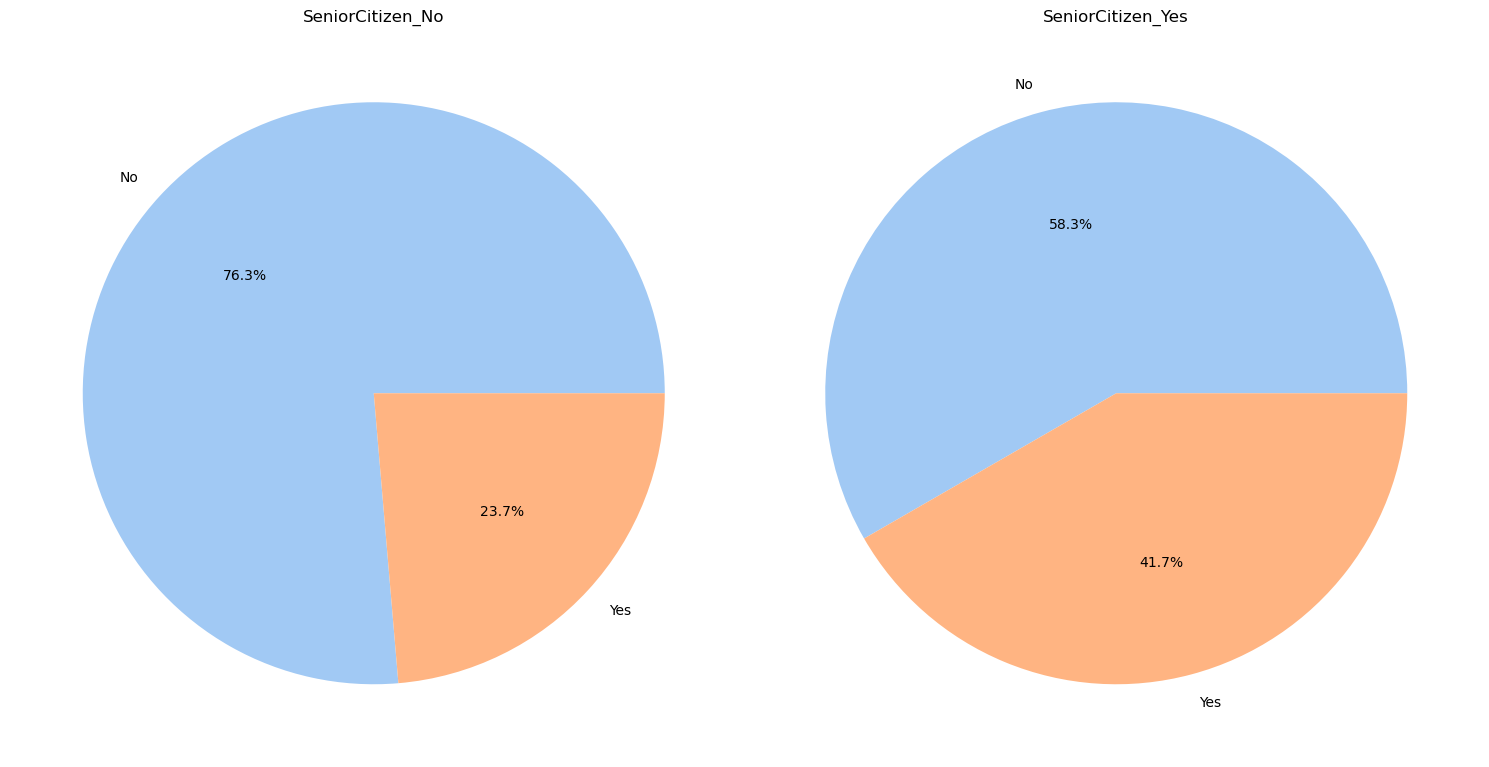

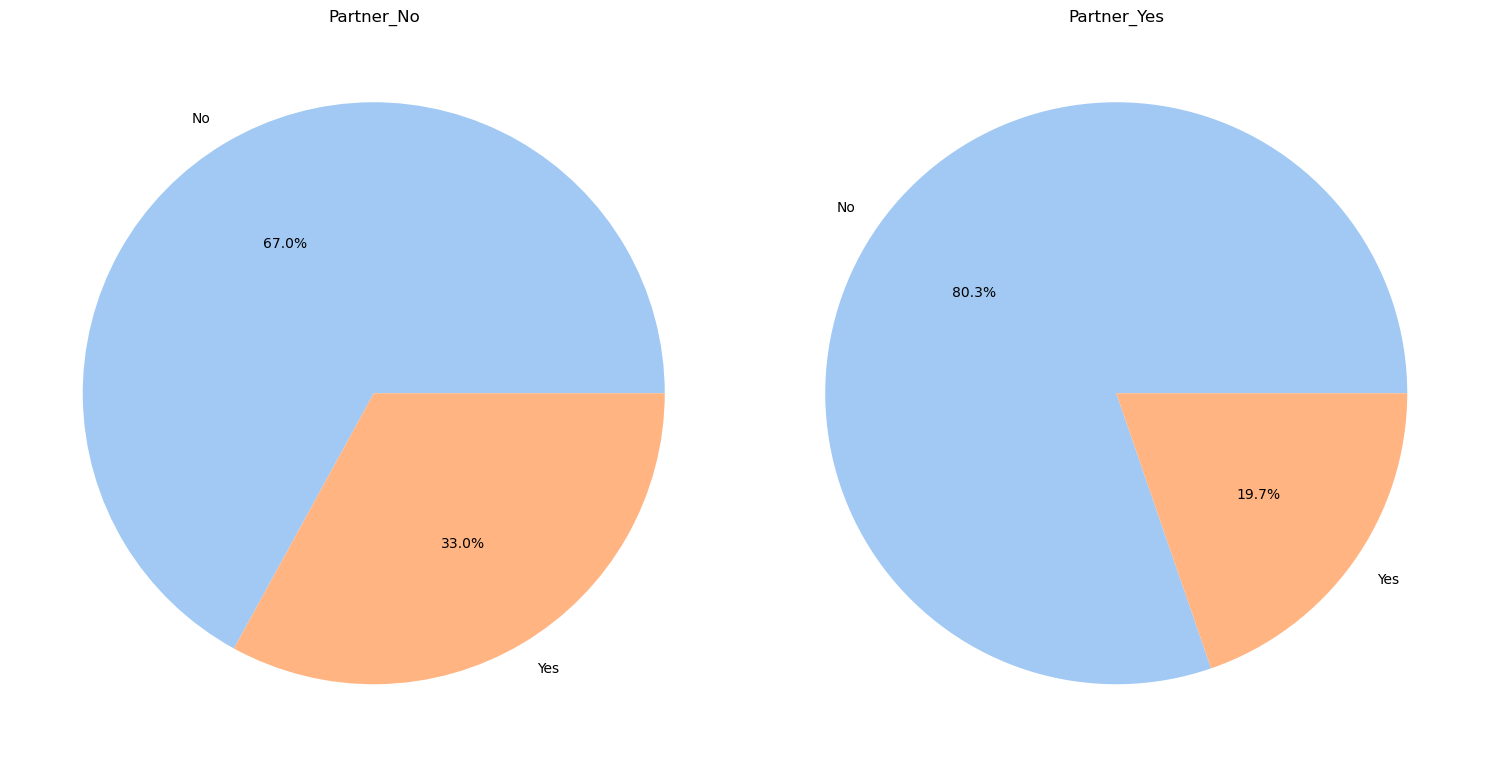

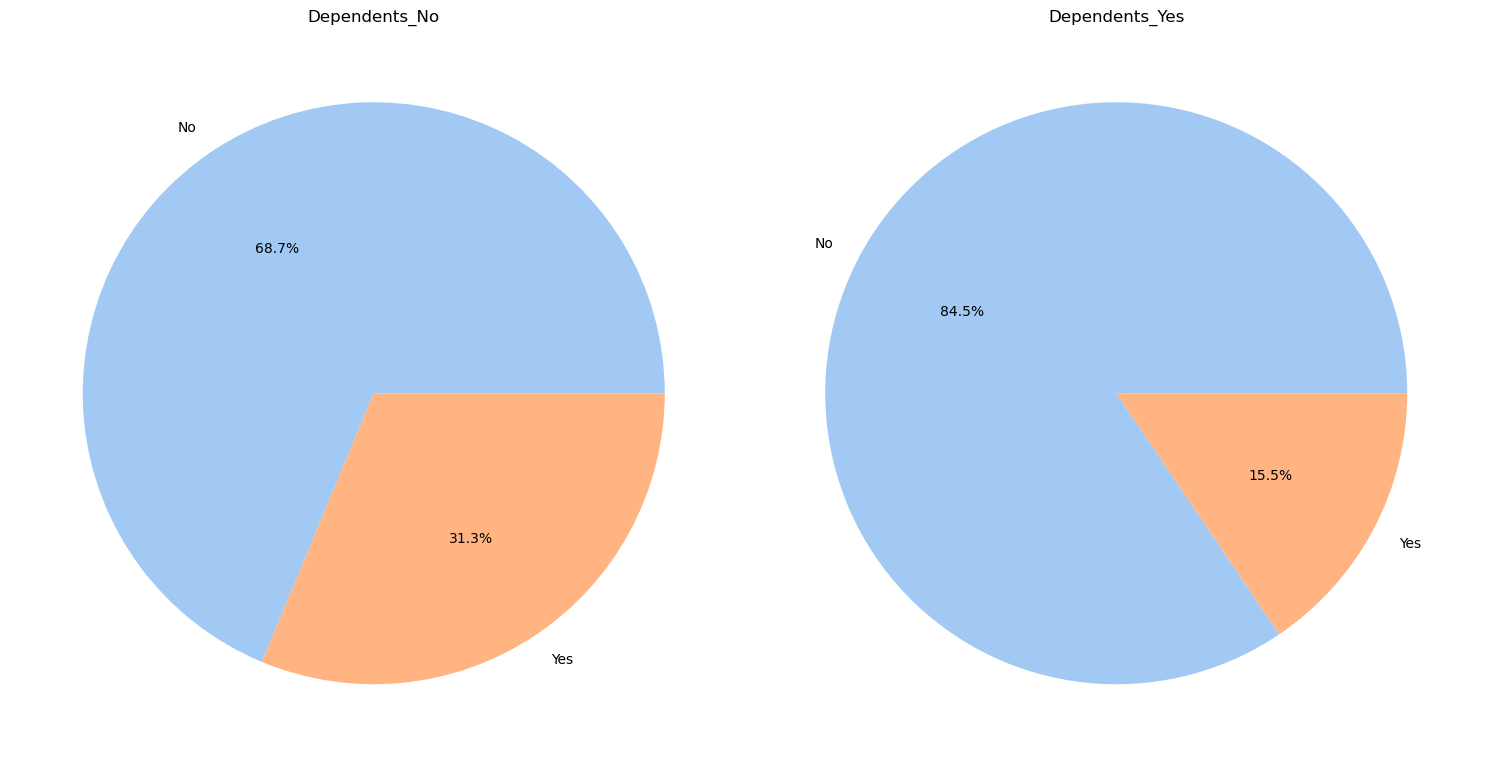

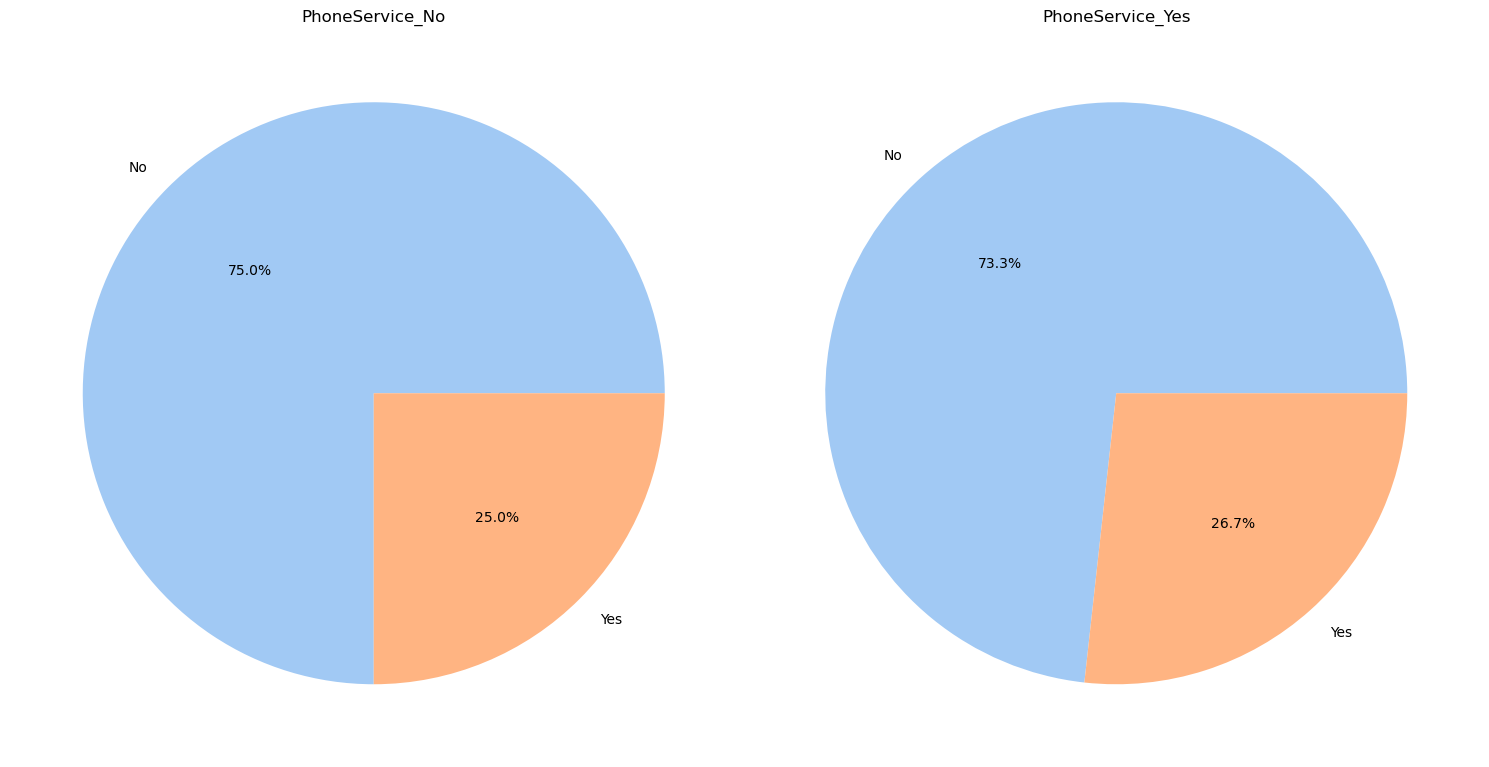

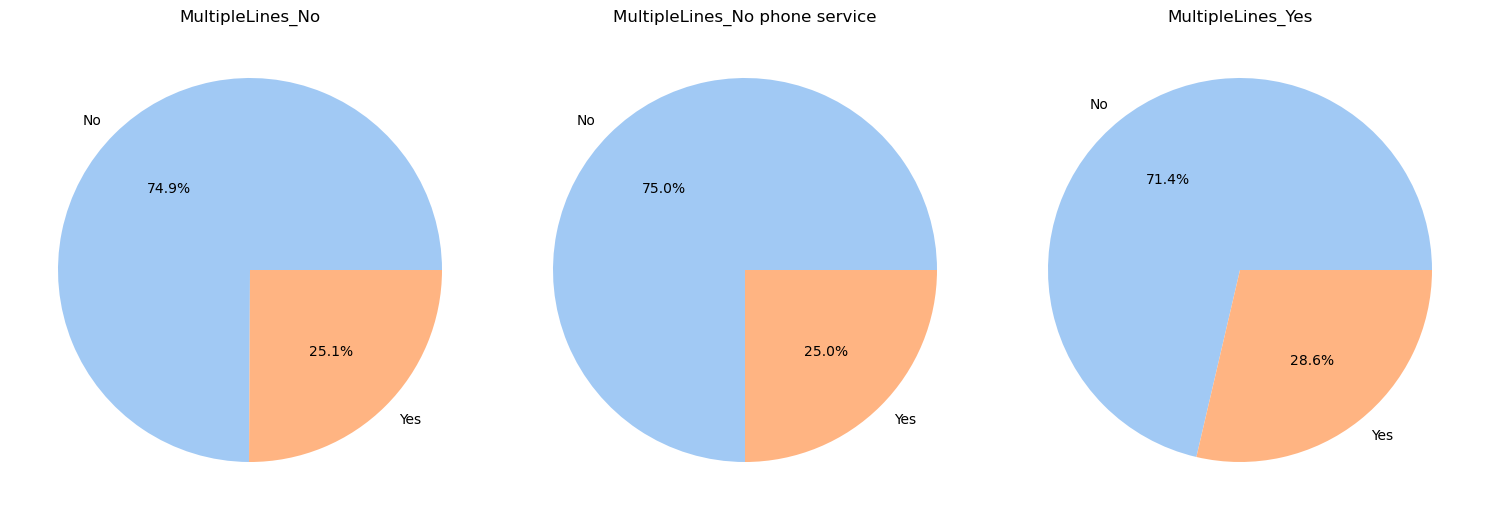

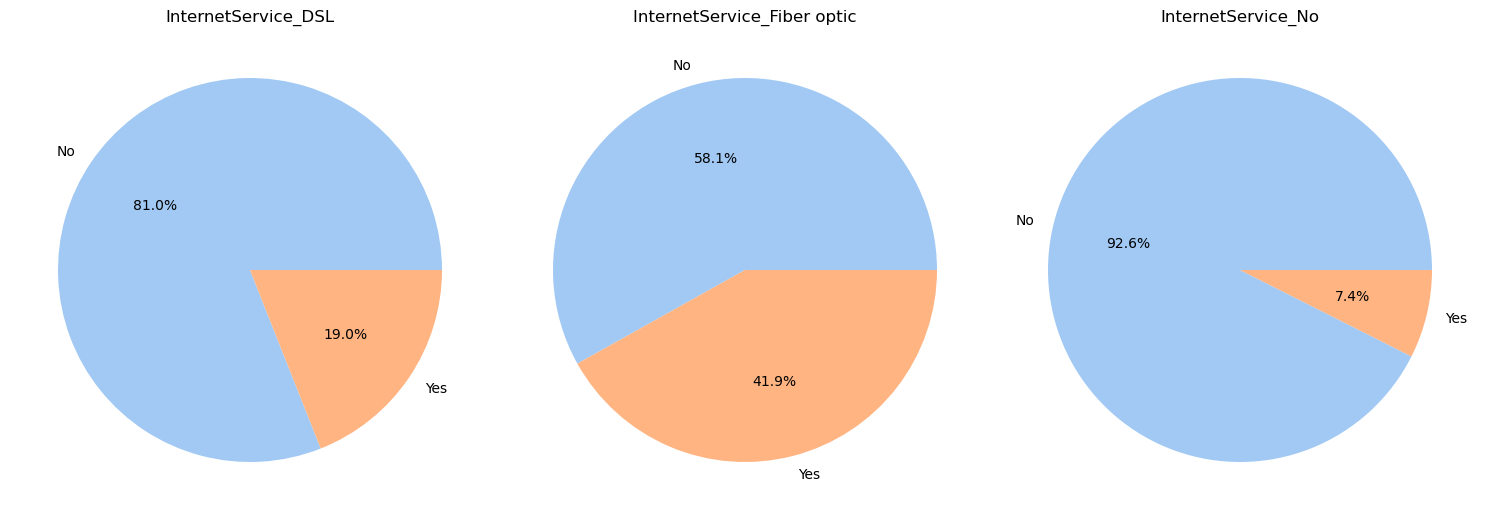

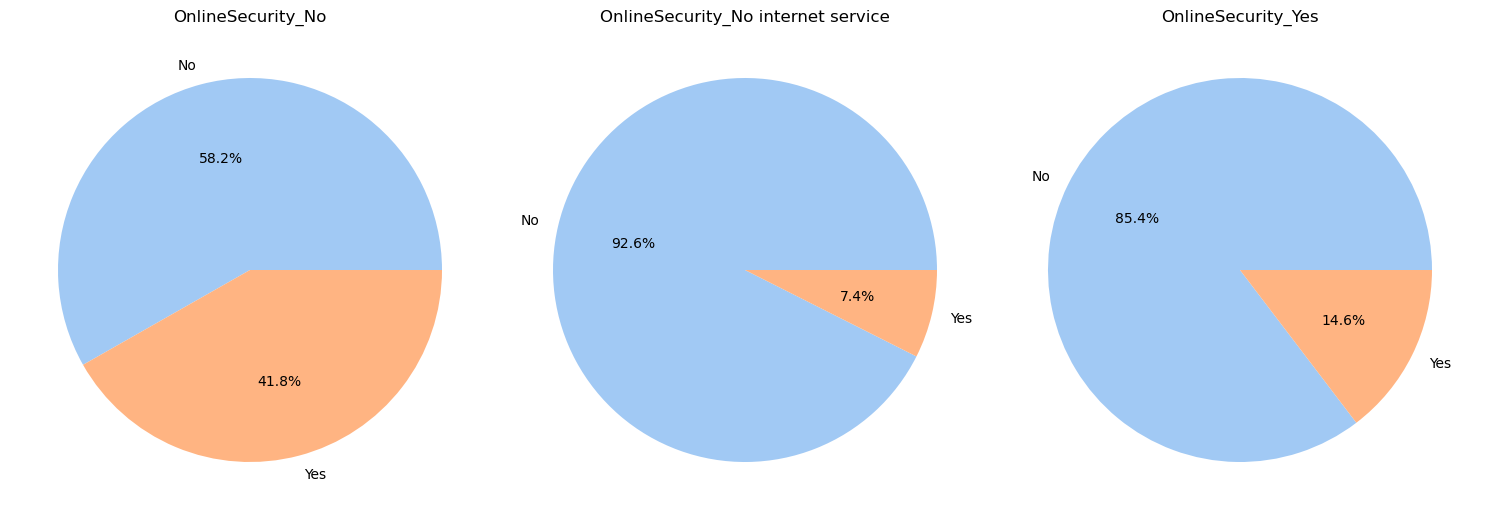

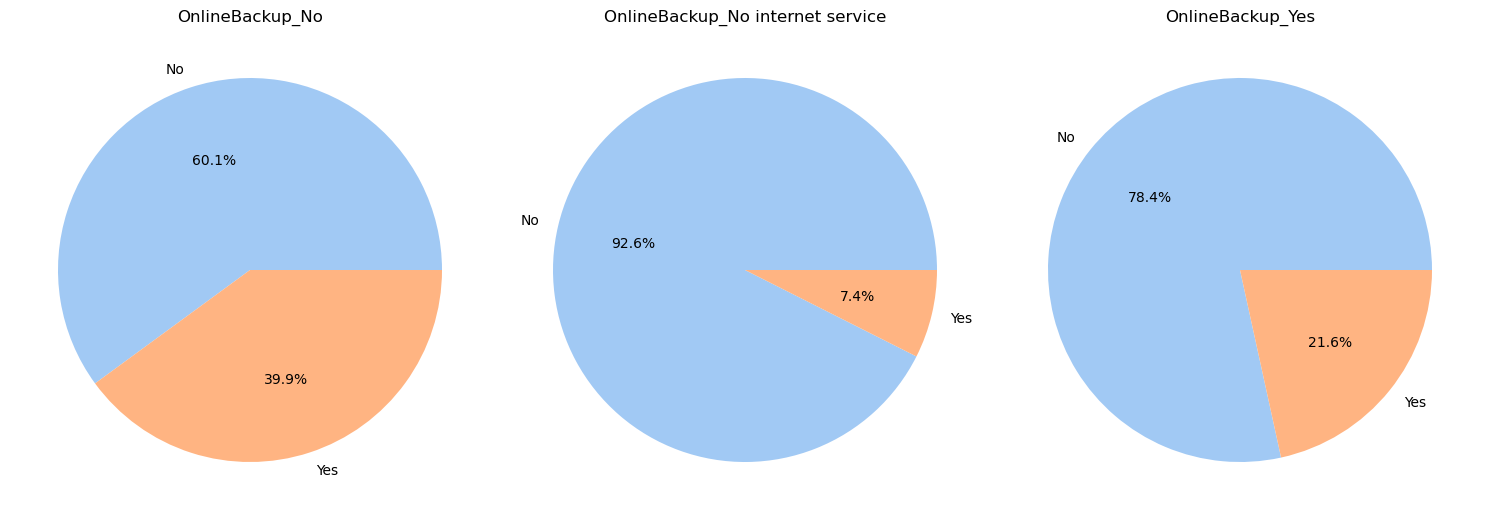

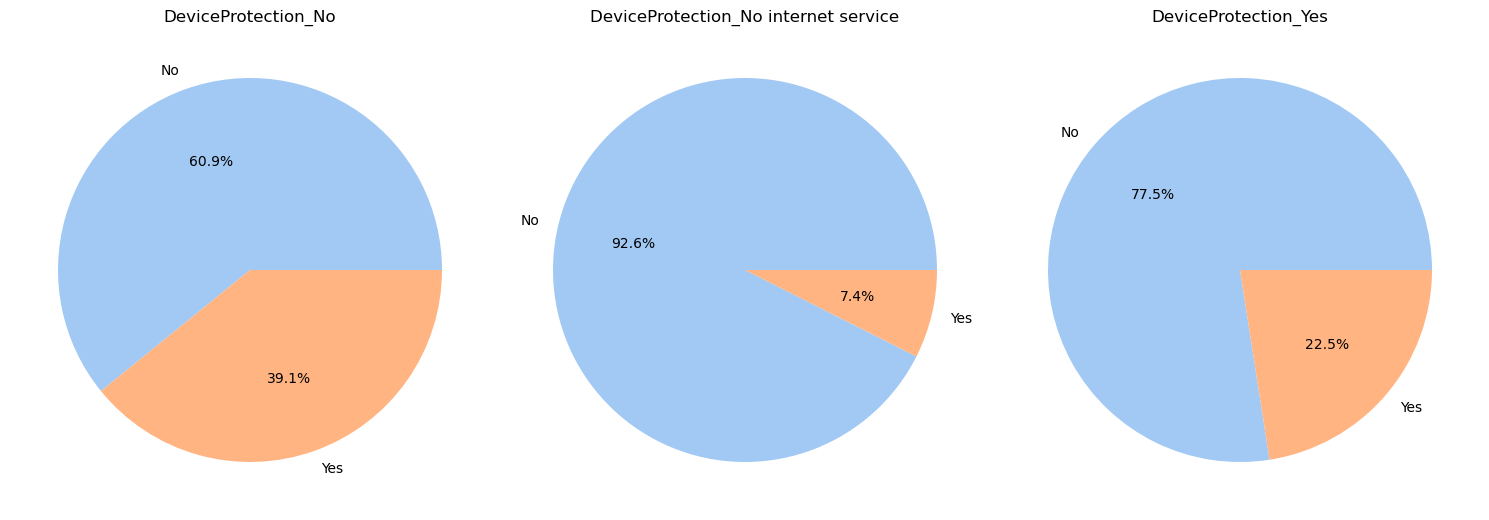

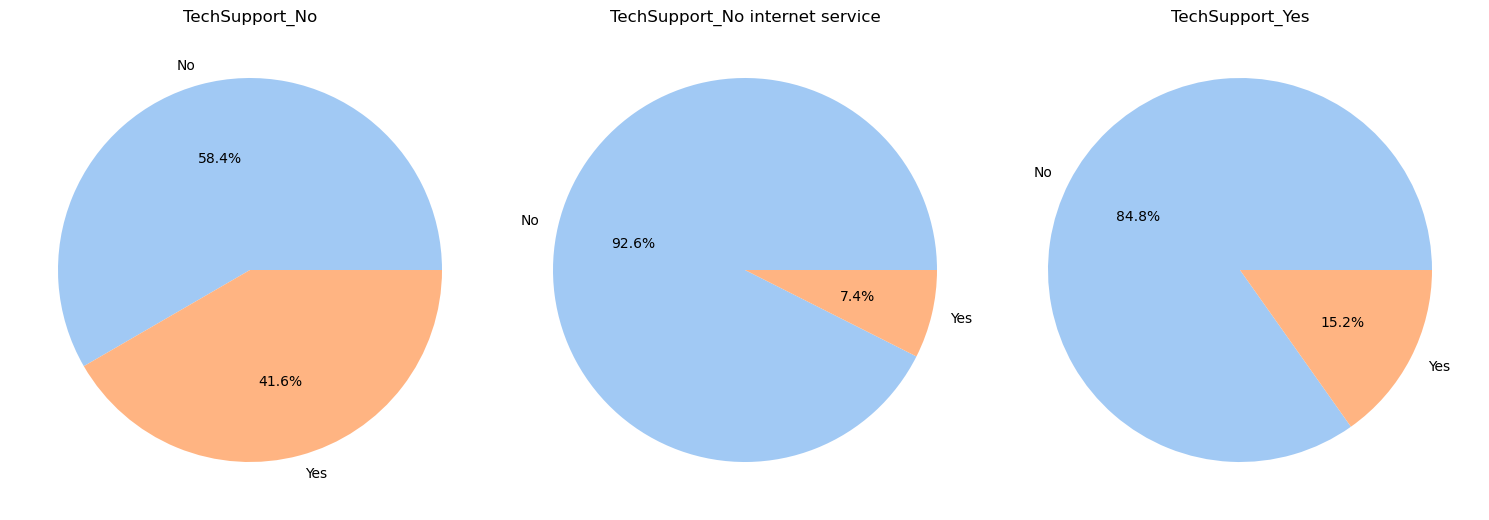

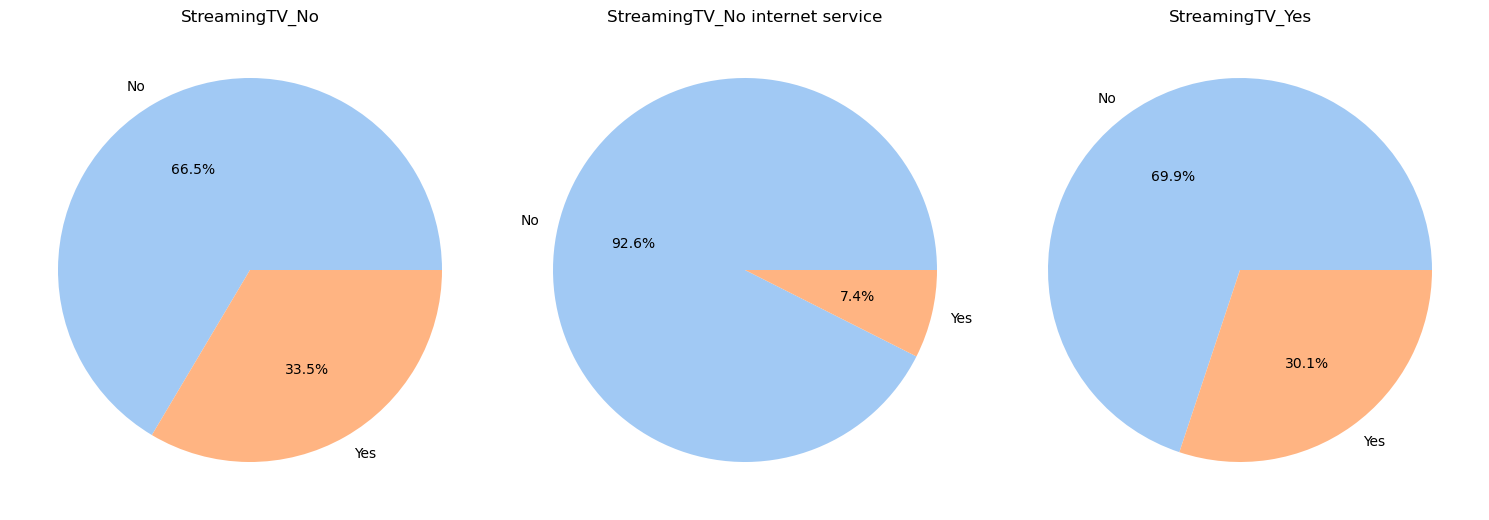

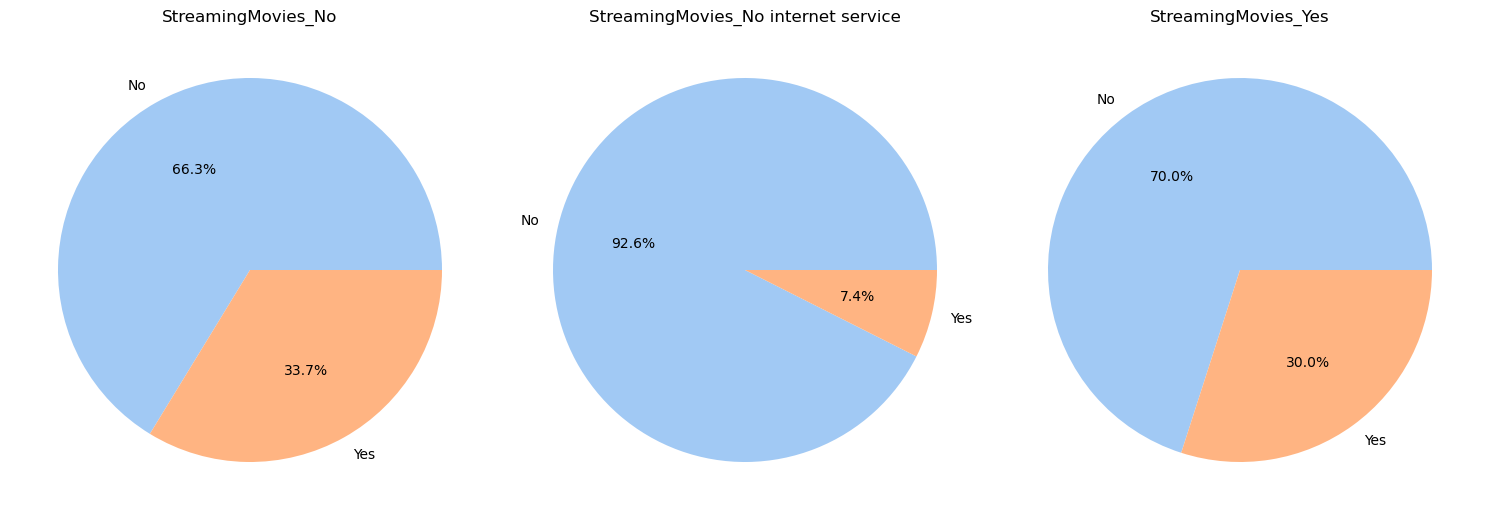

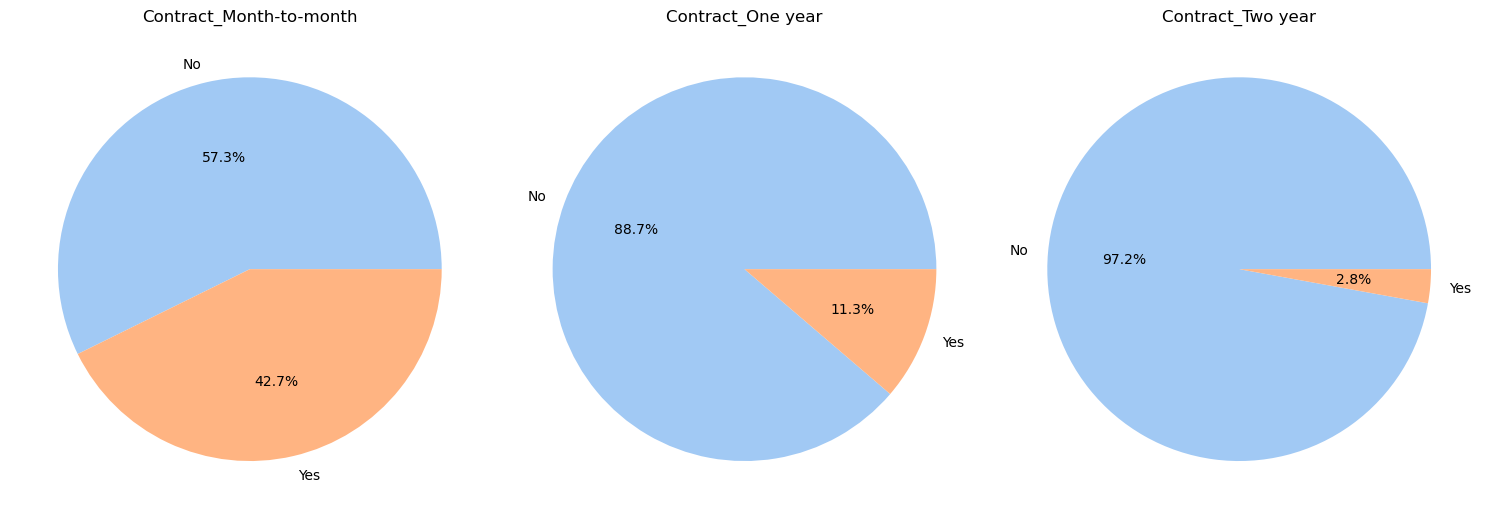

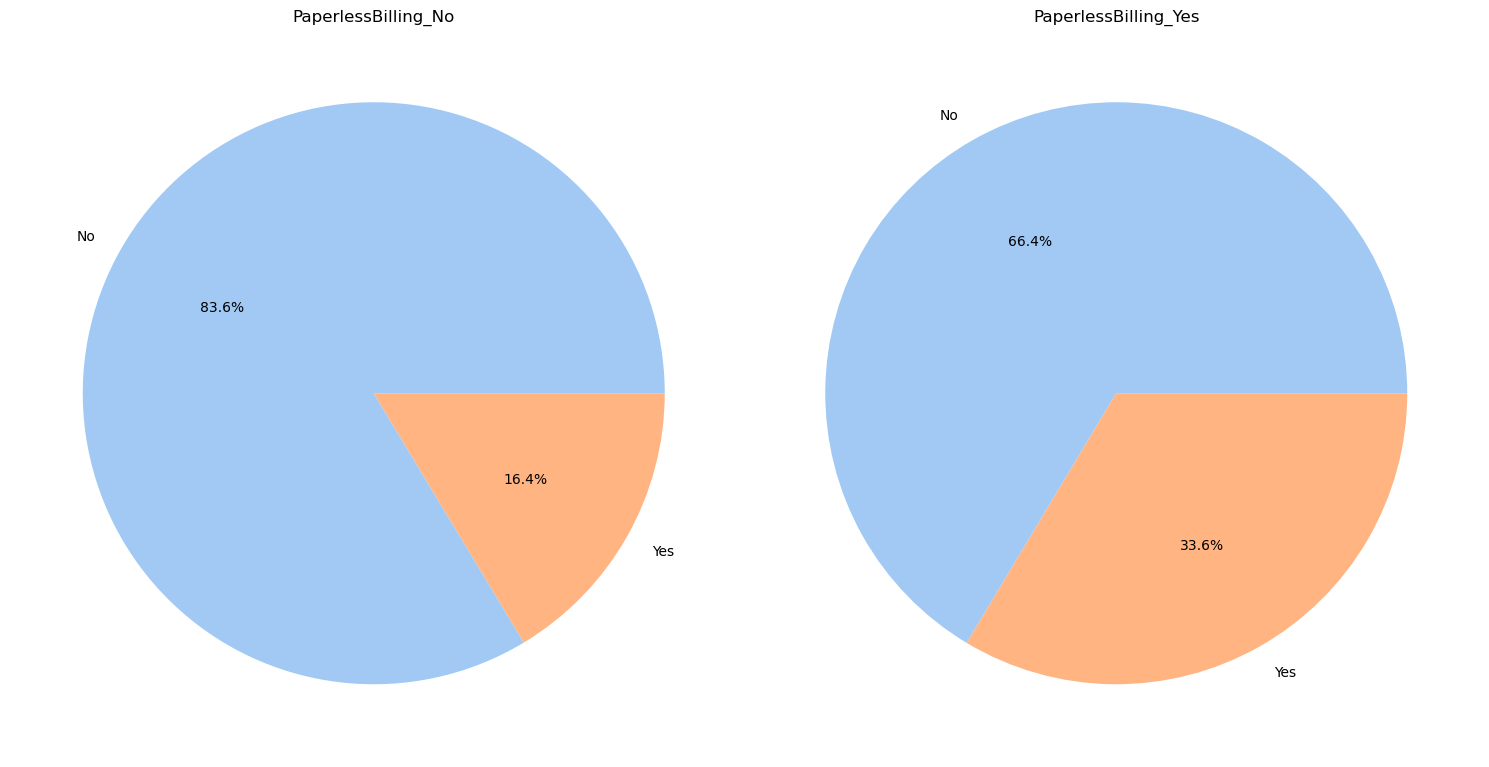

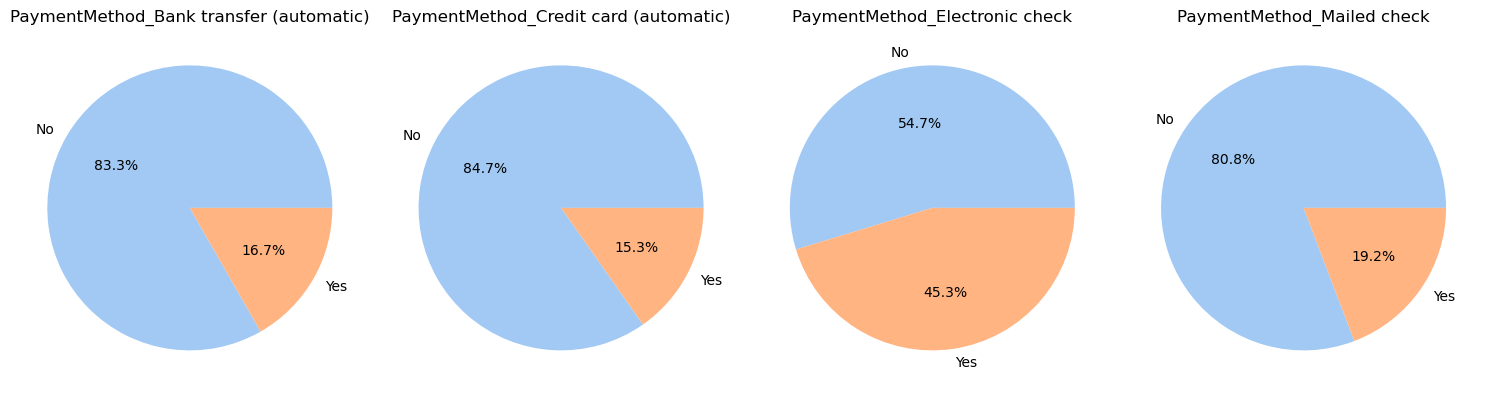

In [21]:
for i, c in enumerate(cate): 
    fig, axes = plt.subplots(nrows=1, ncols=df[c].nunique(), figsize=(15, 10))
    axes = axes.flatten()
    
    for i, s in enumerate(df[c].unique()):
        churn_counts = df.groupby([c, 'Churn']).size().unstack()
        ax = axes[i]
        ax.pie(churn_counts.iloc[i, :], labels=churn_counts.columns, autopct='%1.1f%%')
        ax.set_title(f"{c}_{churn_counts.index[i]}")

    plt.tight_layout()
    plt.show()


### <span style='color:#E1B12D'>Key obervations</span>

Churn rate
<ul>
  <li>
    <ul>
      <li>Gender: Male = Female</li>
      <li>Senior Citizen: Yes > No</li>
      <li>Partner: No > Yes</li>
      <li>Dependents: No > Yes</li>
    </ul>
  </li>
  <li>Services
    <ul>
      <li>Phone Service: Yes similar No</li>
      <li>Multiple Lines: Yes > No = No phone service</li>
      <li>Internet Service: Fiber optic > DSL > No</li>
      <li>Online Security: No > Yes</li>
      <li>Online Backup: No > Yes</li>
      <li>Device Protection: No > Yes</li>
    <li>Tech Support: No > Yes</li>
    </ul>
  </li>
  <li>Streaming
    <ul>
      <li>Streaming TV: No > Yes</li>
      <li>Streaming Movies: No > Yes</li>
    </ul>
  </li>
  <li>Billing
    <ul>
      <li>Contract: M-to-M > One year > Two year</li>
      <li>Paperless Billing: Yes > No</li>
      <li>Payment: Electronic > Mailed, Automatic</li>
    </ul>
  </li>
  <li>The similarity between the service features and the same proportion of streaming may need feature engineering</li>
</ul>

## <span style='color:#E1B12D'>Numerical variables </span>

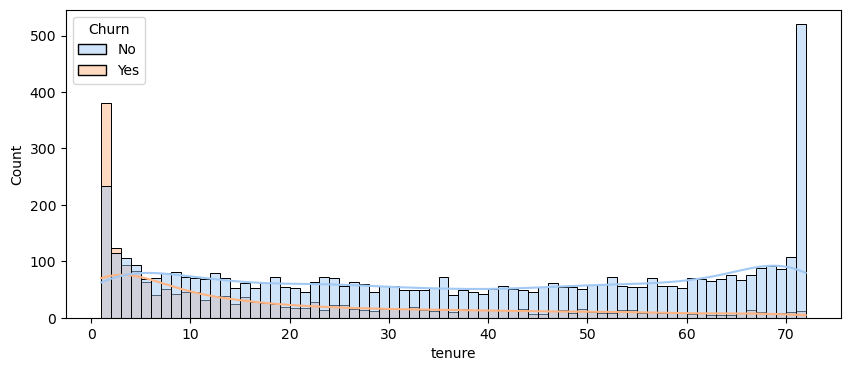

In [22]:
# Plot the boxen plots and set the axis labels and titles
plt.figure(figsize=(10,4))
sns.histplot(x="tenure", data=df, hue="Churn", binwidth=1, kde=True)
plt.show()

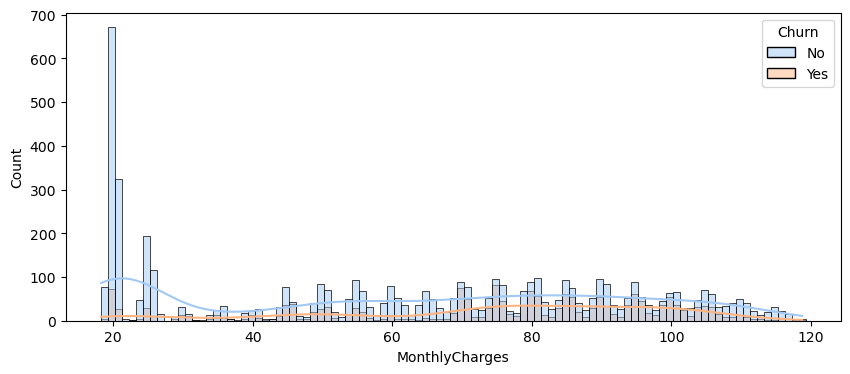

In [23]:
plt.figure(figsize=(10,4))
sns.histplot(x="MonthlyCharges", data=df, hue="Churn", binwidth=1, kde=True)
plt.show()

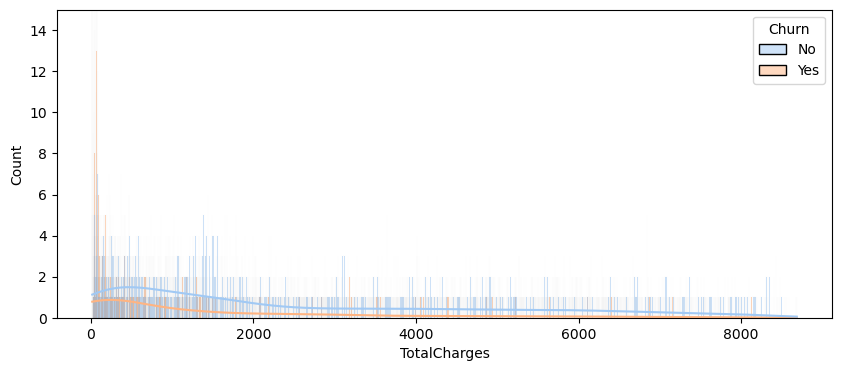

In [24]:
plt.figure(figsize=(10,4))
sns.histplot(x="TotalCharges", data=df, hue="Churn", binwidth=1, kde=True)
plt.ylim(0, 15)
plt.show()

### <span style='color:#E1B12D'>Key observation </span>
- The longer they been cusomter, the more likely they will not churn 
- New custoemrs likely churn
- The cheaper charges, the more customers will stay 

## <span style='color:#E1B12D'>Target variables </span>

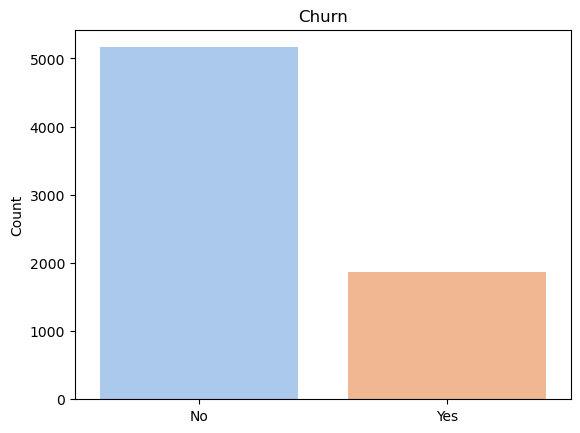

In [25]:
sns.barplot(x=df.Churn.unique(), y=df.Churn.value_counts())
plt.title("Churn")
plt.xlabel('')
plt.ylabel('Count')
plt.show()

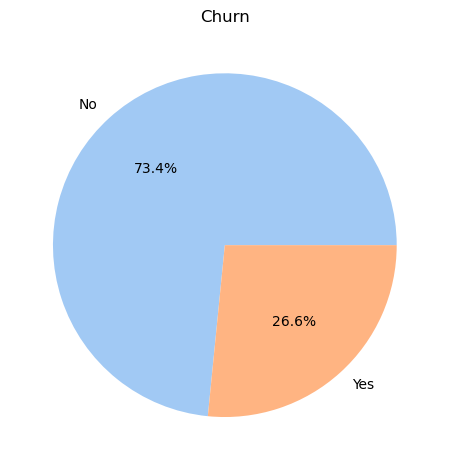

In [26]:
plt.pie(df.Churn.value_counts(), labels=churn_counts.columns, autopct='%1.1f%%')
plt.title(f"Churn")
    
plt.tight_layout()
plt.show()


In [27]:
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [28]:
df.Churn.value_counts()[0] / df.Churn.value_counts()[1]

2.7624398073836276

### <span style='color:#E1B12D'>Key observation </span>
- The number of Churn cusotmer is fewer than not churn
- This indicates imbalance dataset requrie resampleing / class weights

<h1>
<div style="padding:20px;
            color:white;
            margin:10px;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">
    <span style='color:#CDA63A'>|</span> Feature Engineering </div></h1>

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


## <span style='color:#E1B12D'> Handle Categorical features </span>

In [30]:
df.PaymentMethod

0                Electronic check
1                    Mailed check
2                    Mailed check
3       Bank transfer (automatic)
4                Electronic check
                  ...            
7038                 Mailed check
7039      Credit card (automatic)
7040             Electronic check
7041                 Mailed check
7042    Bank transfer (automatic)
Name: PaymentMethod, Length: 7032, dtype: object

### <span style='color:#E1B12D'>Encode</span>

In [31]:
cate = [c for c in df.iloc[:,:-1].columns if df[c].dtype == "object"]
cate

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [32]:
new_value = {'No internet service': 'No',
             'No phone service': 'No',
             'Bank transfer (automatic)': 'Automatic',
             'Credit card (automatic)': 'Automatic'}

df = df.replace(new_value)

In [33]:
from sklearn.preprocessing import LabelEncoder
# X = [X_train, X_test, X_val]
categorical_cols = [c for c in df.columns if df[c].dtype == 'object']
df_encoded = df.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])

In [34]:
df_encoded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,2,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,2,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,2,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,0,103.20,7362.90,0
7040,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,1,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,2,74.40,306.60,1


### <span style='color:#E1B12D'> Grouping feature </span>

In [35]:
g1 = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]
g2 = ["StreamingTV", "StreamingMovies"]

In [36]:
def group_col(df, col, col_name, drop=False):
    df2 = df.copy()
    df2[f"{col_name}"] = df2[col].sum(axis=1)
    if drop:
        df2.drop(col, axis=1, inplace=True)
    return df2

df_encoded = group_col(df_encoded, g1, 'no_of_internet_service_use', drop=True)
df_encoded = group_col(df_encoded, g2, 'no_of_streaming_use', drop=True)

In [37]:
df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,no_of_internet_service_use,no_of_streaming_use
0,0,0,1,0,1,0,0,0,0,1,1,29.85,29.85,0,1,0
1,1,0,0,0,34,1,0,0,1,0,2,56.95,1889.50,0,2,0
2,1,0,0,0,2,1,0,0,0,1,2,53.85,108.15,1,2,0
3,1,0,0,0,45,0,0,0,1,0,0,42.30,1840.75,0,3,0
4,0,0,0,0,2,1,0,1,0,1,1,70.70,151.65,1,0,0


## <span style='color:#E1B12D'>Split data </span>

In [38]:
y = df.Churn
y = np.where(y == "Yes",1,0)
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop("Churn", axis=1), y, test_size=0.2, random_state=SEED)



In [39]:
def remove_all(col):
    global X_train, X_test
    X = [X_train, X_test]

    for i, data in enumerate(X):
        df2 = data.drop(col, axis=1)
        X[i] = df2
        
    X_train, X_test = X

## <span style='color:#E1B12D'>Handle Numeric features </span>

### <span style='color:#E1B12D'>Transformation </span>

In [40]:
for col in conti:
    X_train[col] = np.log(1+X_train[col])
    X_test[col] = np.log(1+X_test[col])

In [41]:
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)

### <span style='color:#E1B12D'>Standardized</span>

In [42]:
def std(train, test):
    conti_col = [c for c in train.columns if train[c].dtype == 'float64']
    train_std, test_std = train.copy(), test.copy()
    scaler = StandardScaler()
    train_std.loc[:, conti_col] = scaler.fit_transform(train_std[conti_col])
    test_std.loc[:, conti_col] = scaler.transform(test_std[conti_col])
    return train_std, test_std

#Use it during corss_val or final model to prevent data leakage

## <span style='color:#E1B12D'>Correlation</span>

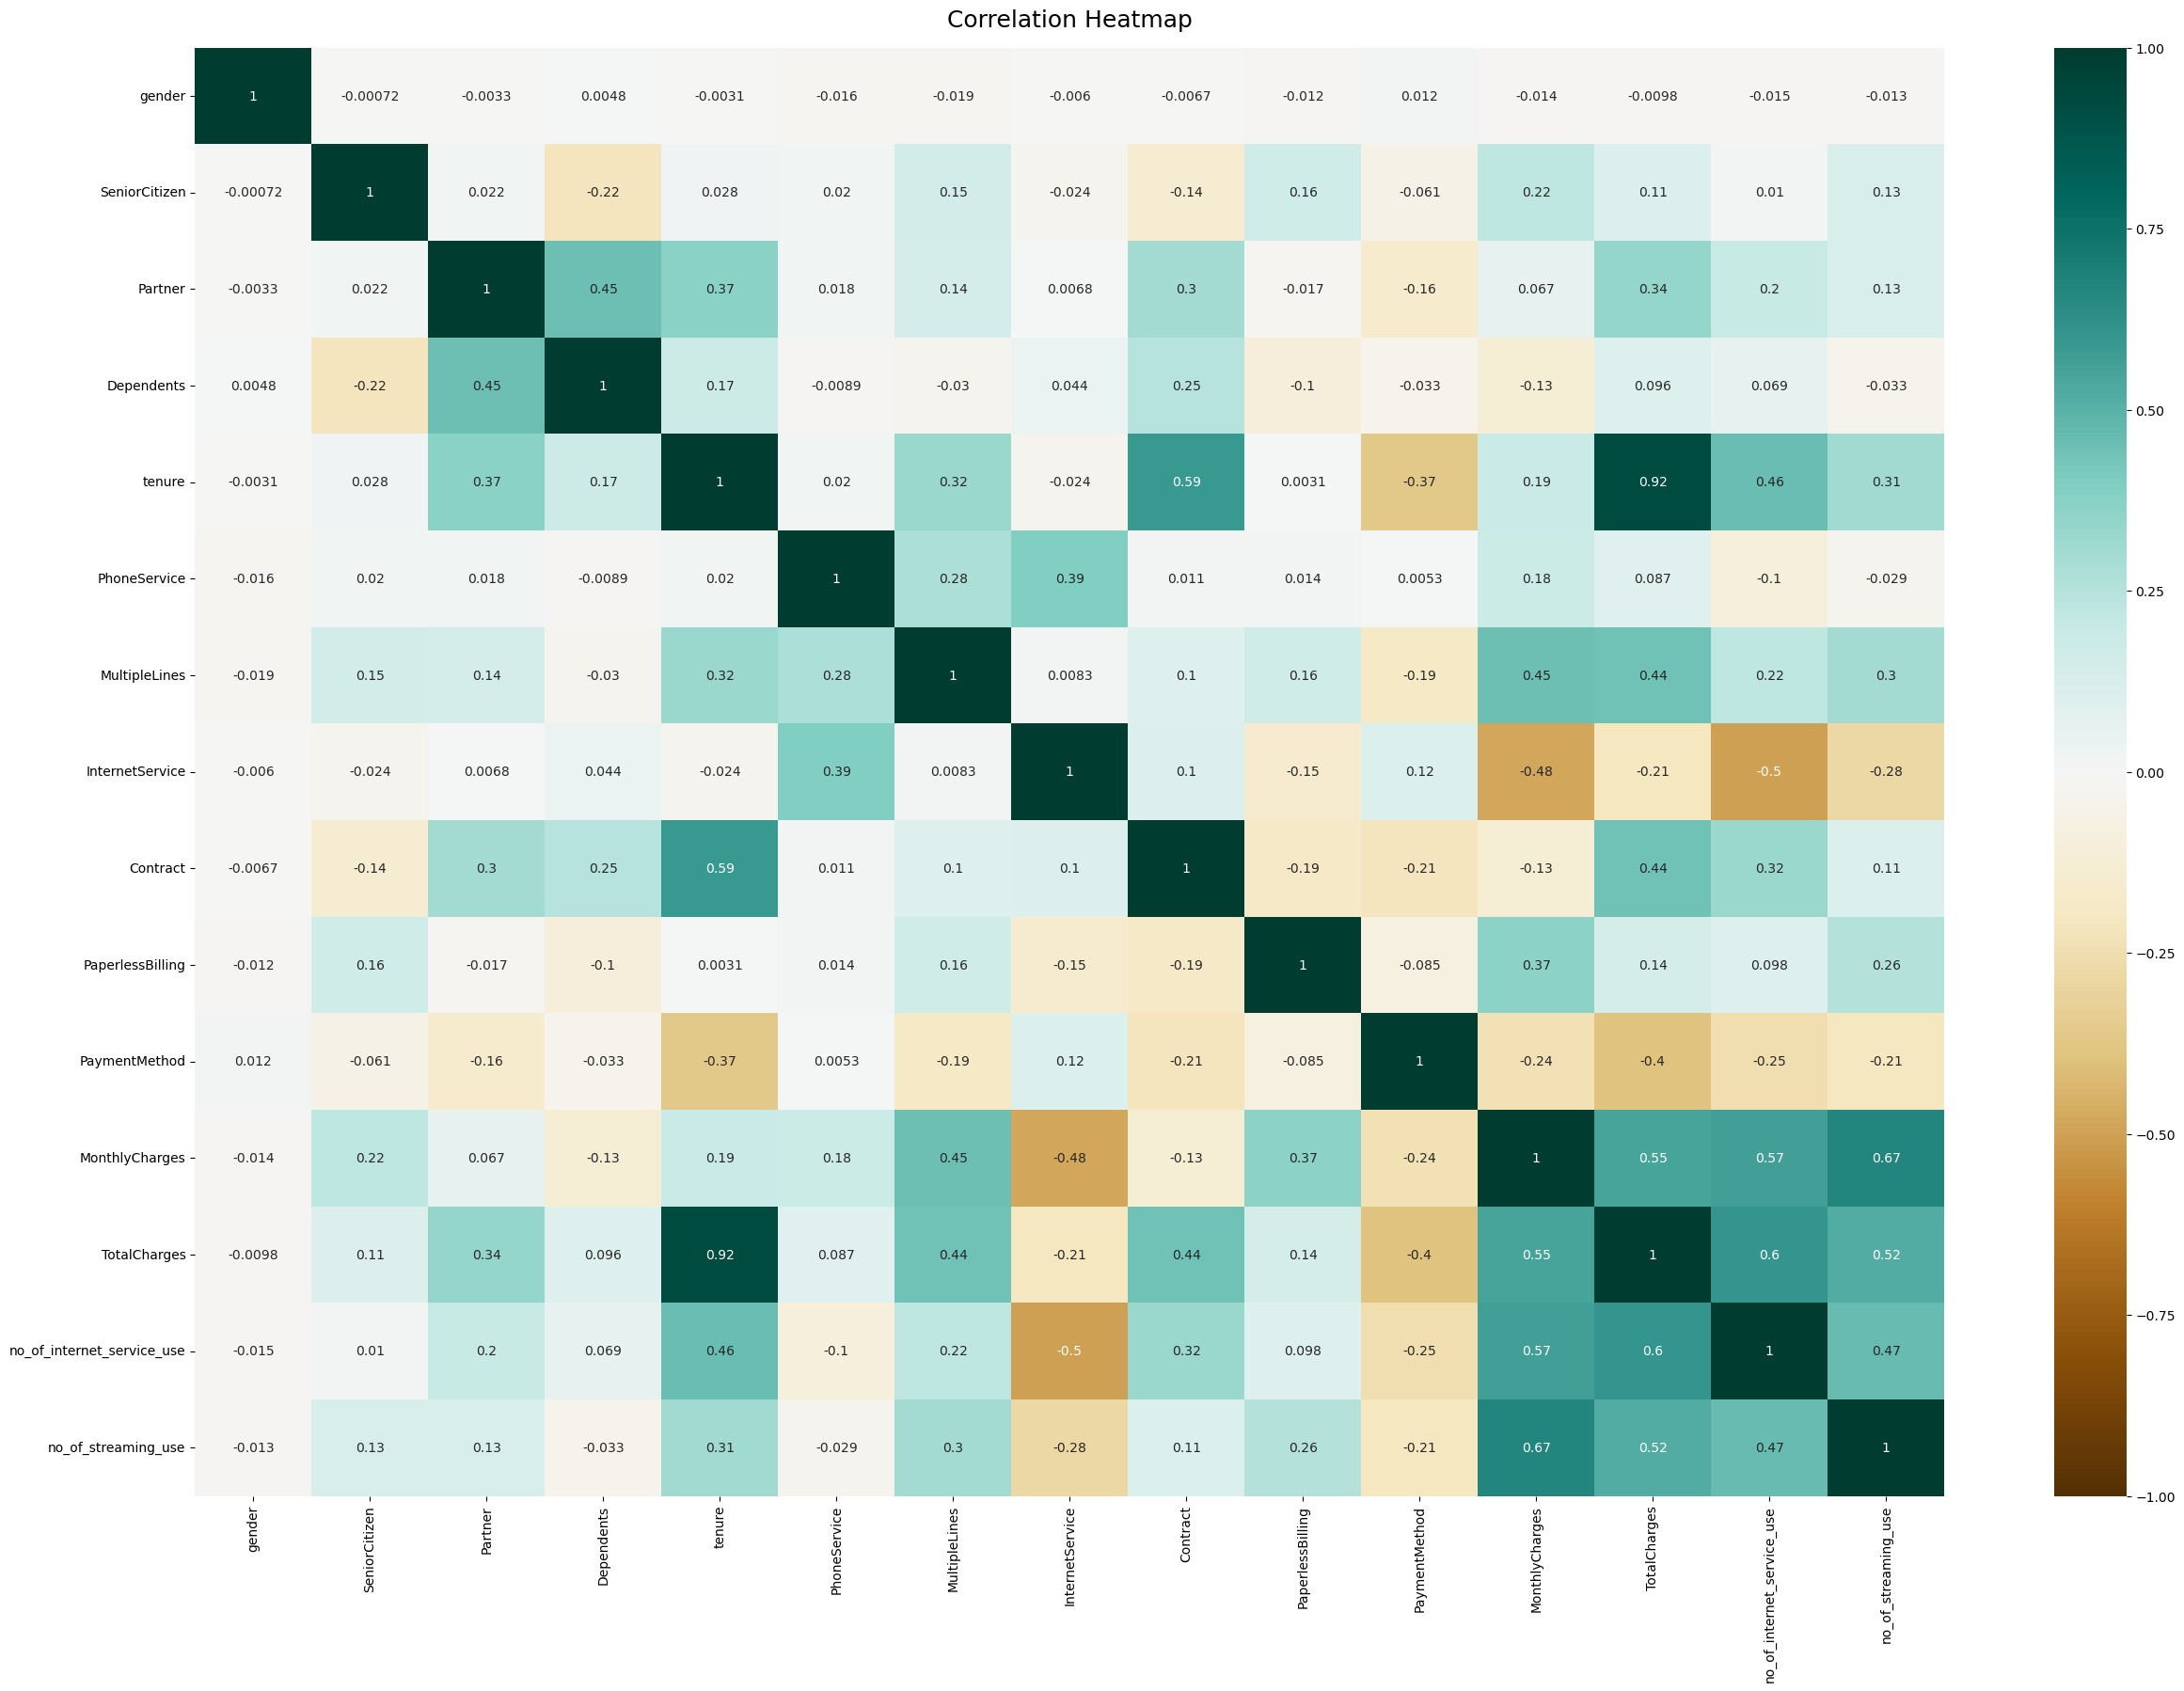

In [43]:
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(X_train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [44]:
df_corr = X_train.copy()
df_corr["Churn"] = y_train

In [45]:
df_corr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,no_of_internet_service_use,no_of_streaming_use,Churn
0,0,0,1,0,3.912023,1,0,2,1,1,0,3.046901,6.828820,0,0,0
1,1,0,1,1,3.931826,1,0,0,1,1,0,3.824284,7.710586,0,0,0
2,1,0,1,0,2.564949,1,0,1,0,1,0,4.454929,6.908555,1,1,0
3,0,0,0,0,2.772589,1,1,1,0,1,1,4.616605,7.255591,1,2,0
4,1,0,0,0,3.806662,1,0,0,1,0,1,4.195697,7.928604,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5620,0,0,0,0,1.609438,1,0,1,1,1,1,4.669552,6.097850,3,2,1
5621,1,0,1,0,1.945910,1,1,1,0,1,1,4.429029,6.133940,0,1,1
5622,1,0,0,0,2.639057,1,1,1,0,0,2,4.596634,7.115785,1,2,1
5623,0,1,0,0,1.791759,1,0,1,0,1,2,4.249209,5.766757,0,0,1


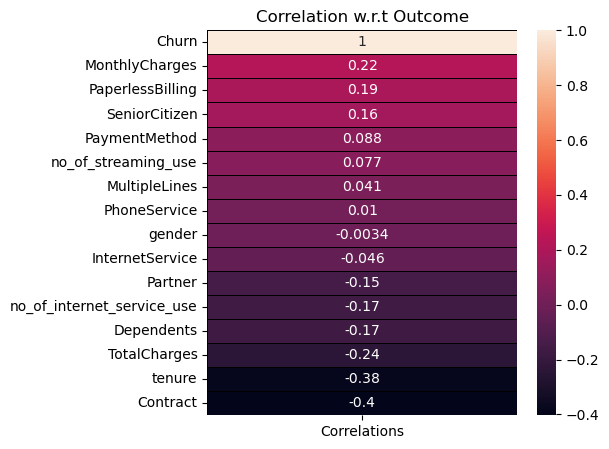

In [46]:
corr = df_corr.corrwith(df_corr['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

In [47]:
corr

,Correlations
Churn,1.000000
MonthlyCharges,0.216844
PaperlessBilling,0.193630
SeniorCitizen,0.164083
PaymentMethod,0.088292
no_of_streaming_use,0.077237
MultipleLines,0.040561
PhoneService,0.010166
gender,-0.003377
InternetService,-0.045813


In [48]:
corr_to_remove = (abs(corr)).sort_values(by="Correlations", ascending = False)

In [49]:
corr_to_remove

,Correlations
Churn,1.000000
Contract,0.403155
tenure,0.382108
TotalCharges,0.242237
MonthlyCharges,0.216844
PaperlessBilling,0.193630
Dependents,0.167911
no_of_internet_service_use,0.167465
SeniorCitizen,0.164083
Partner,0.146379


In [50]:
to_remove= corr_to_remove[corr_to_remove.Correlations < 0.04].index
to_remove

Index(['PhoneService', 'gender'], dtype='object')

In [51]:
remove_all(to_remove)

## <span style='color:#E1B12D'>Features Importanace </span>

### <span style='color:#E1B12D'> Chi-squared </span>

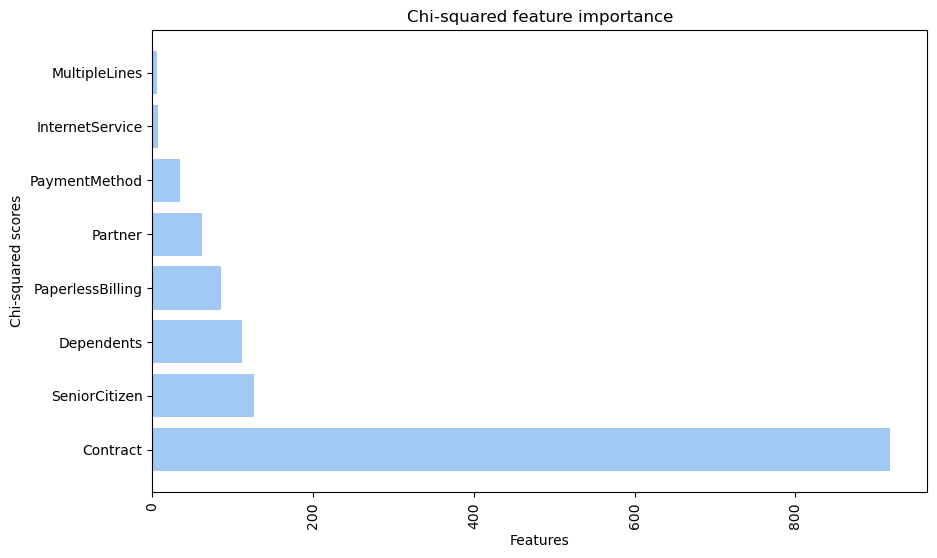

In [52]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

cate_2 = [c for c in cate if c in X_train.columns] 
# conti = [c for c in X_train.columns if c not in cate]

selector = SelectKBest(chi2, k='all')

# Then, fit the selector to your data
selector.fit(X_train[cate_2], y_train)

# Get the chi-squared scores and corresponding feature names
scores = selector.scores_
feature_names = X_train[cate_2].columns

# Sort the scores and feature names in descending order
sorted_idx = scores.argsort()[::-1]
scores = scores[sorted_idx]
feature_names = feature_names[sorted_idx]

# Plot the chi-squared scores
plt.figure(figsize=(10, 6))
plt.barh(feature_names, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Chi-squared scores')
plt.title('Chi-squared feature importance')
plt.show()


In [53]:
to_remove = [f for f, s in zip(feature_names, scores) if s < 20]
to_remove

['InternetService', 'MultipleLines']

In [54]:
# remove_all(to_remove)

### <span style='color:#E1B12D'> LightGBM </span>

In [55]:
import lightgbm
from lightgbm import LGBMClassifier

def smote_kfold_lgbm(X, y, num_of_fold):
    KFold_importance = np.zeros((num_of_fold, len(X.columns)))
    prediction = []
    kf = KFold(n_splits=num_of_fold, shuffle=True, random_state=SEED)

    for i, (train_idx, val_idx) in enumerate(kf.split(X)):
        X_train_fold, y_train_fold = X.iloc[train_idx, :], y[train_idx]
        X_val_fold, y_val_fold = X.iloc[val_idx,:], y[val_idx]
        
        X_train_fold, X_val_fold = std(X_train_fold, X_val_fold)
        # Perform SMOTE resampling on the training set
        smote = SMOTE()
        X_train_fold_res, y_train_fold_res = smote.fit_resample(X_train_fold, y_train_fold)

        # Define the parameters for the Random Forest model
        params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'metric': 'binary_logloss',
                'num_leaves': 31,
                'learning_rate': 0.05,
                'verbose': -1,
                'random_state': SEED
            }

        # Create a Random Forest model
        lgbm = LGBMClassifier(**params)

        # Train the model
        lgbm.fit(X_train_fold_res, y_train_fold_res, verbose= False)

        # Calculate metrics on validation set
        y_pred_val = lgbm.predict(X_val_fold)
        f1 = f1_score(y_val_fold, y_pred_val)
        acc = accuracy_score(y_val_fold, y_pred_val)
        prec = precision_score(y_val_fold, y_pred_val)
        rec = recall_score(y_val_fold, y_pred_val)
        print(f'Fold {i+1}: Accuracy = {acc:.4f}, F1 score = {f1:.4f}, Precision = {prec:.4f}, Recall = {rec:.4f}')
        print("-"*85)

        importance_ = lgbm.feature_importances_
        KFold_importance[i] = importance_

    return KFold_importance

In [56]:
NUBMER_OF_FOLD = 10
KFold_importance = smote_kfold_lgbm(X_train, y_train, NUBMER_OF_FOLD)

Fold 1: Accuracy = 0.7336, F1 score = 0.6011, Precision = 0.4956, Recall = 0.7635
-------------------------------------------------------------------------------------
Fold 2: Accuracy = 0.7869, F1 score = 0.6591, Precision = 0.5859, Recall = 0.7532
-------------------------------------------------------------------------------------
Fold 3: Accuracy = 0.7496, F1 score = 0.5889, Precision = 0.4951, Recall = 0.7266
-------------------------------------------------------------------------------------
Fold 4: Accuracy = 0.7780, F1 score = 0.6518, Precision = 0.5598, Recall = 0.7800
-------------------------------------------------------------------------------------
Fold 5: Accuracy = 0.7655, F1 score = 0.6229, Precision = 0.5561, Recall = 0.7078
-------------------------------------------------------------------------------------
Fold 6: Accuracy = 0.7313, F1 score = 0.6037, Precision = 0.5088, Recall = 0.7419
------------------------------------------------------------------------------

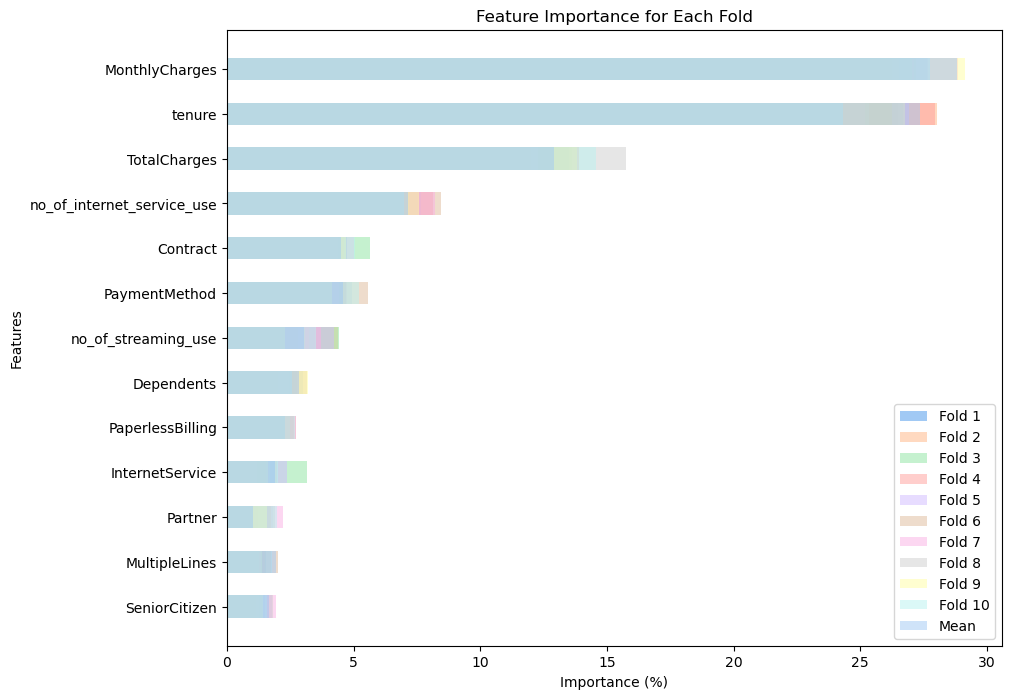

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))

# Get the mean feature importance across all folds
mean_importance = np.mean(KFold_importance, axis=0)

# Sort the features by mean importance in descending order
sorted_idx = np.argsort(mean_importance)
sorted_features = X_train.columns[sorted_idx]
sorted_importance = mean_importance[sorted_idx]

# Convert importance values to percentages
sorted_importance_pct = sorted_importance / np.sum(sorted_importance) * 100

# Plot the mean feature importances
ax.barh(sorted_features, sorted_importance_pct, height=0.5)

# Plot the sorted feature importances for each fold
for i in range(KFold_importance.shape[0]):
    importance_pct = KFold_importance[i, sorted_idx] / np.sum(KFold_importance[i, sorted_idx]) * 100
    ax.barh(sorted_features, importance_pct, height=0.5, alpha=0.5)

ax.set_xlabel('Importance (%)') # Add percentage symbol to axis label
ax.set_ylabel('Features')
ax.set_title('Feature Importance for Each Fold')
ax.legend(['Fold {}'.format(i+1) for i in range(KFold_importance.shape[0])] + ['Mean'])

plt.show()


In [58]:
to_remove = [f for f, s in zip(sorted_features, sorted_importance_pct) if s < 2.5]
to_remove

['SeniorCitizen', 'MultipleLines', 'Partner', 'InternetService']

In [59]:
remove_all(to_remove)

In [60]:
X_train.shape

(5625, 9)

<h1>
<div style="padding:20px;
            color:white;
            margin:10px;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">
    <span style='color:#CDA63A'>|</span> Model </div></h1>

## <span style='color:#E1B12D'>Resampling</span>

In [61]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay, confusion_matrix
import logging
import lightgbm as lgb
lgb_logger = logging.getLogger('lightgbm')
lgb_logger.setLevel(logging.CRITICAL)

In [62]:
def get_smote(xtrain, ytrain, xtest, ytest):
    xtrain, xtest = std(xtrain, xtest)
    smote = SMOTE(random_state=SEED)
    X_train_resampled, y_train_resampled = smote.fit_resample(xtrain, ytrain)
    return X_train_resampled, y_train_resampled, xtest, ytest

In [63]:
def model_train(classifier, x_train, y_train, x_test, y_test, threshold=0.5, class_weight=None, smote=False, info=True):
    
    if smote:
        x_train_res, y_train_res, x_test, y_test = get_smote(x_train, y_train, x_test, y_test)
    else:
        x_train, x_test = std(x_train, x_test)
        
    classifier.fit(x_train, y_train)
    y_proba = classifier.predict_proba(x_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)
    
    if info:
        print("Accuracy Score : ",'{0:.2%}'.format(accuracy_score(y_test, y_pred)))
        print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test, y_pred)))
        display = RocCurveDisplay.from_predictions(y_test, y_proba, name='ROC_AUC_Plot')
    
    return y_proba
    
    
def model_evaluation(classifier, x_test, y_test, threshold=0.5):
    # Predict class probabilities
    y_proba = classifier.predict_proba(x_test)[:, 1]
    
    # Convert probabilities to binary predictions using threshold
    y_pred = (y_proba >= threshold).astype(int)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    tn, fp, fn, tp = counts
    labels = [f'TP={tp}\n', f'FP={fp}\n', f'FN={fn}\n', f'TN={tn}\n']
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='', xticklabels=['1', '0'], yticklabels=['1', '0'])
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')    
    
    # Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))


### <span style='color:#E1B12D'>RF</span>

Accuracy Score :  75.27%
ROC_AUC Score :  56.91%


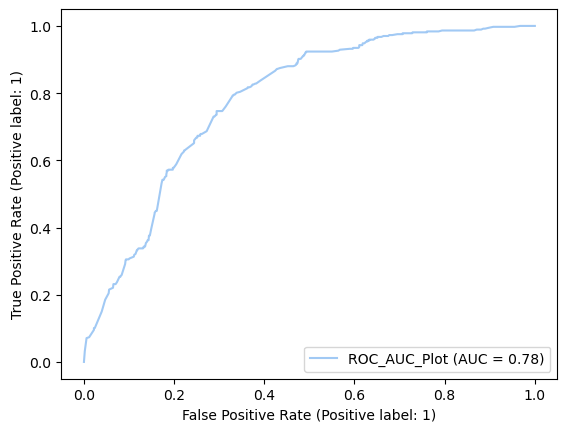

In [64]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
_ = model_train(classifier_rf, X_train, y_train, X_test, y_test, smote=True)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1040
           1       0.68      0.37      0.48       367

    accuracy                           0.79      1407
   macro avg       0.75      0.65      0.67      1407
weighted avg       0.78      0.79      0.77      1407



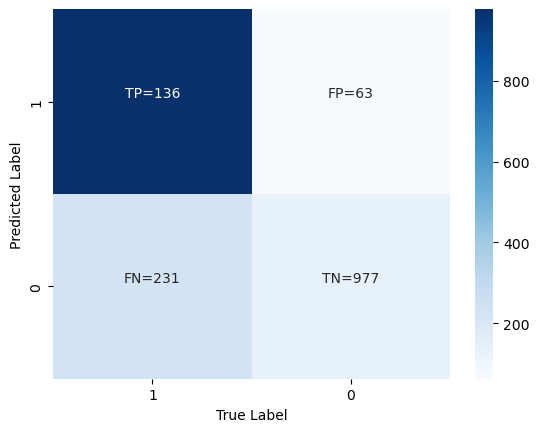

In [65]:
model_evaluation(classifier_rf, X_test, y_test, threshold=0.5)

### <span style='color:#E1B12D'>LightGBM</span>

Accuracy Score :  73.63%
ROC_AUC Score :  51.84%


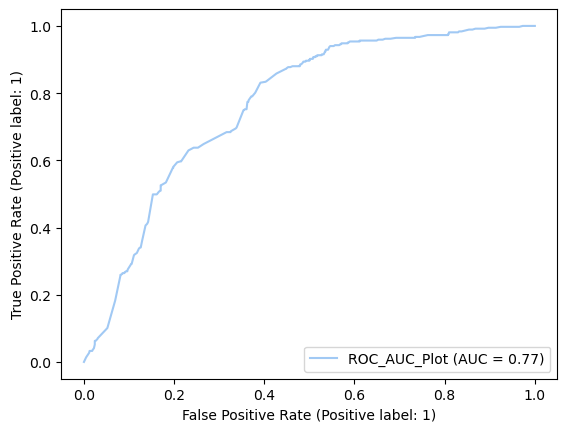

In [66]:
from lightgbm import LGBMClassifier


classifier_lgbm = LGBMClassifier(boosting_type='gbdt',
                     objective='binary',
                     metric='auc',
                     num_leaves=31,
                     learning_rate=0.05,
                     verbose=-100, random_state=SEED)

_= model_train(classifier_lgbm, X_train, y_train, X_test, y_test, smote=True)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1040
           1       0.62      0.46      0.53       367

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



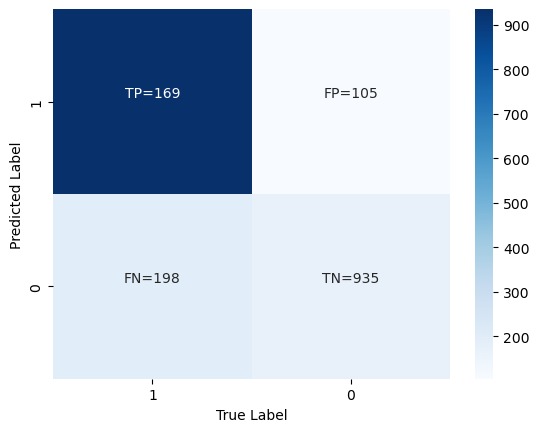

In [67]:
model_evaluation(classifier_lgbm, X_test, y_test, threshold=0.5)

<h3>
<div style="padding:20px;
            color:white;
            margin:10px;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">
    <span style='color:#CDA63A'>|</span> Hyperparameters Tunning </div></h3>

In [68]:
import optuna
from sklearn.metrics import f1_score, make_scorer

def optimize_lgbm_smote(x_train, y_train, n_trials=100, cv=5):
    
    def objective(trial):
        params = {
            'objective': 'binary',
            'metric': 'auc',
            'bosting_type': 'gbdt',
            'random_state': SEED,
            'lambda_l1': trial.suggest_float('lambda_l1', 0, 1),
            'lambda_l2': trial.suggest_float('lambda_l2', 0, 1),
            'num_leaves': trial.suggest_int('num_leaves', 2, 256),
            'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
            'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
            'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
            'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        }
        th = trial.suggest_float('th', 0.4, 0.6)

        # Define the SVC model
        model = LGBMClassifier(**params, verbose=-100)


        # Define the cross-validation splits
        kf = KFold(n_splits=cv, shuffle=True, random_state=SEED)


        # Train and evaluate the model for each cross-validation split with SMOTE
        roc_auc_scores = []
        for i, (train_idx, val_idx) in enumerate(kf.split(x_train)):
            x_train_cv, y_train_cv = x_train.iloc[train_idx], y_train[train_idx]
            x_val_cv, y_val_cv = x_train.iloc[val_idx], y_train[val_idx]

            y_val_pred_proba = model_train(model,x_train_cv, y_train_cv, x_val_cv, y_val_cv, smote=True, info=False)

            y_val_pred = (y_val_pred_proba >= th).astype(int)
            roc_auc = roc_auc_score(y_val_cv, y_val_pred)

            roc_auc_scores.append(roc_auc)

        roc_auc = np.mean(roc_auc)

        return roc_auc


    # Define the Optuna study and optimize the objective function
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    # Get the best hyperparameters and F1 score
    best_params = study.best_params
    best_f1 = study.best_value

    model = LGBMClassifier(
        objective='binary',
        metric='auc',
        verbose = -100,
        boosting_type = 'gbdt',
        lambda_l1 = best_params['lambda_l1'],
        lambda_l2 = best_params['lambda_l2'],
        num_leaves = best_params['num_leaves'],
        feature_fraction = best_params['feature_fraction'],
        bagging_fraction = best_params['bagging_fraction'],
        bagging_freq = best_params['bagging_freq'],
        min_child_samples = best_params['min_child_samples']
    )
    
    return model, best_params["th"]

In [69]:
%%capture 
opti_lgbm_smote, th = optimize_lgbm_smote(X_train, y_train, n_trials=100)

[I 2023-05-30 20:18:20,528] A new study created in memory with name: no-name-6dac00c2-cf0c-458a-8cfe-15044cc329b6
[I 2023-05-30 20:18:23,710] Trial 0 finished with value: 0.5 and parameters: {'lambda_l1': 0.14044407503663936, 'lambda_l2': 0.8948076447659045, 'num_leaves': 128, 'feature_fraction': 0.4217068861274008, 'bagging_fraction': 0.6859681949793947, 'bagging_freq': 4, 'min_child_samples': 7, 'th': 0.4678828051660533}. Best is trial 0 with value: 0.5.
[I 2023-05-30 20:18:24,822] Trial 1 finished with value: 0.6357059403265034 and parameters: {'lambda_l1': 0.007672652146788472, 'lambda_l2': 0.6854139583500116, 'num_leaves': 133, 'feature_fraction': 0.9166169414304974, 'bagging_fraction': 0.5542129783789242, 'bagging_freq': 3, 'min_child_samples': 51, 'th': 0.40161326669423836}. Best is trial 1 with value: 0.6357059403265034.
[I 2023-05-30 20:18:25,785] Trial 2 finished with value: 0.5 and parameters: {'lambda_l1': 0.5465818144849788, 'lambda_l2': 0.735967948094545, 'num_leaves': 87

In [70]:
opti_lgbm_smote

LGBMClassifier(bagging_fraction=0.5955716046938276, bagging_freq=4,
               feature_fraction=0.6156896628469689,
               lambda_l1=0.15737193358231322, lambda_l2=0.4561080259997211,
               metric='auc', min_child_samples=89, num_leaves=123,
               objective='binary', verbose=-100)

[LightGBM] [Warning] bagging_fraction is set=0.5955716046938276, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5955716046938276
[LightGBM] [Warning] feature_fraction is set=0.6156896628469689, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6156896628469689
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.4561080259997211, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4561080259997211
[LightGBM] [Warning] lambda_l1 is set=0.15737193358231322, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15737193358231322
Accuracy Score :  75.20%
ROC_AUC Score :  57.65%


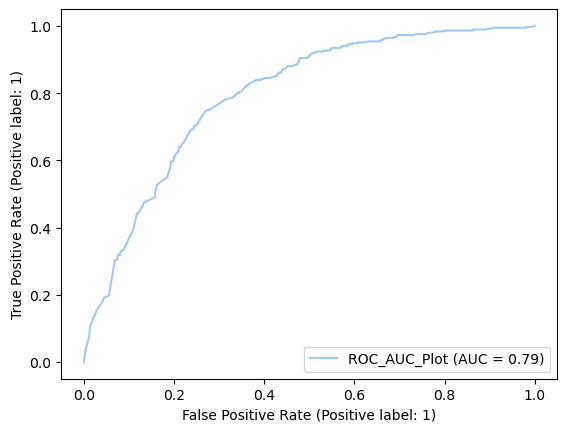

In [71]:
_ = model_train(opti_lgbm_smote,X_train, y_train, X_test, y_test, smote=True)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1040
           1       0.59      0.59      0.59       367

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



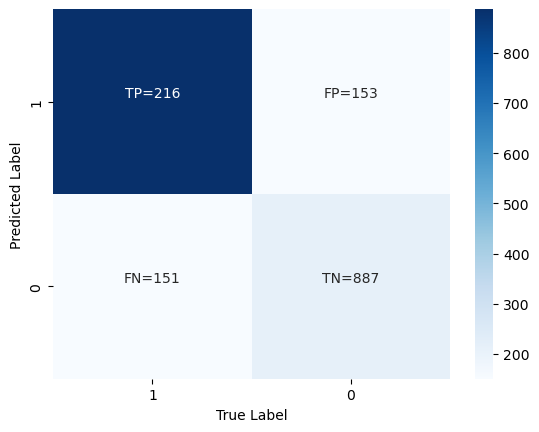

In [72]:
model_evaluation(opti_lgbm_smote, X_test, y_test, threshold=th)

## <span style='color:#E1B12D'>Cost-sensitive Learning</span>

In [73]:
from sklearn.utils.class_weight import compute_class_weight

# Define your class labels
labels = [0, 1]

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Print the class weights
print("Class Weights:", class_weights)


Class Weights: [0.68214892 1.87250333]


### <span style='color:#E1B12D'>RF </span>

Accuracy Score :  71.00%
ROC_AUC Score :  73.68%


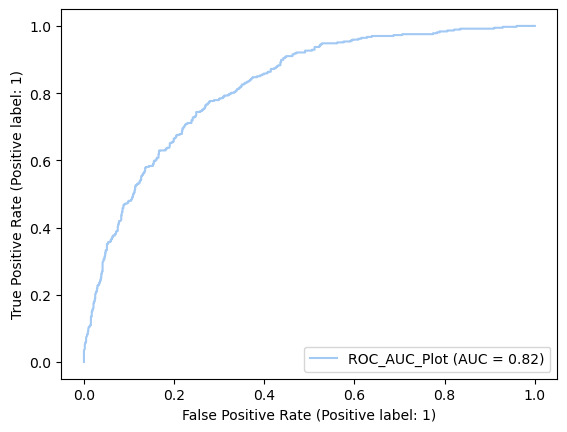

In [74]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0, class_weight={0: 0.68214892, 1: 1.87250333})
_ = model_train(classifier_rf,X_train, y_train, X_test,y_test, smote=False)

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1040
           1       0.48      0.77      0.59       367

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407



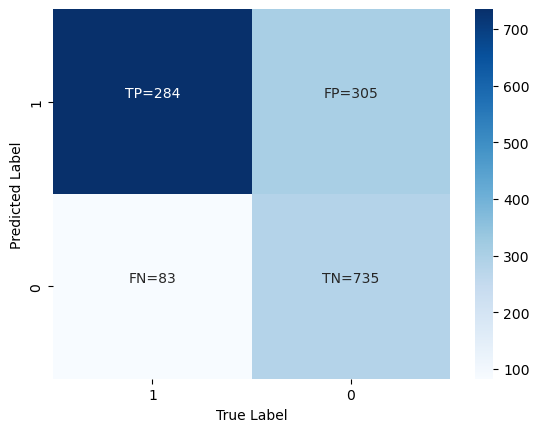

In [75]:
model_evaluation(classifier_rf, X_test, y_test)

### LGBM

Accuracy Score :  74.77%
ROC_AUC Score :  74.73%


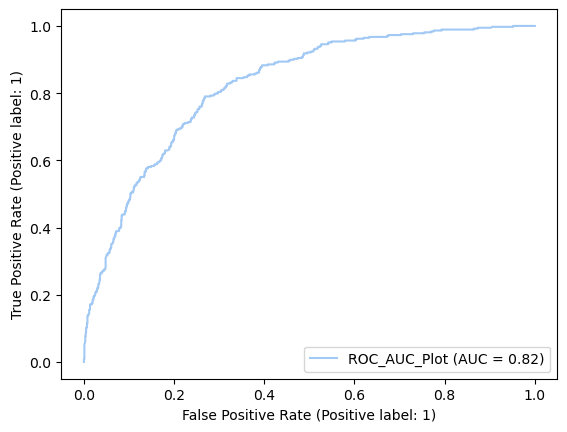

In [76]:
classifier_lgbm = LGBMClassifier(boosting_type='gbdt',
                     objective='binary',
                     metric='auc',
                     num_leaves=31,
                     learning_rate=0.05,
                     class_weight={0: 0.68214892, 1: 1.87250333},
                     verbose=-100,random_state=SEED)

_= model_train(classifier_lgbm, X_train, y_train, X_test, y_test, smote=False)

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1040
           1       0.62      0.30      0.41       367

    accuracy                           0.77      1407
   macro avg       0.71      0.62      0.63      1407
weighted avg       0.75      0.77      0.74      1407



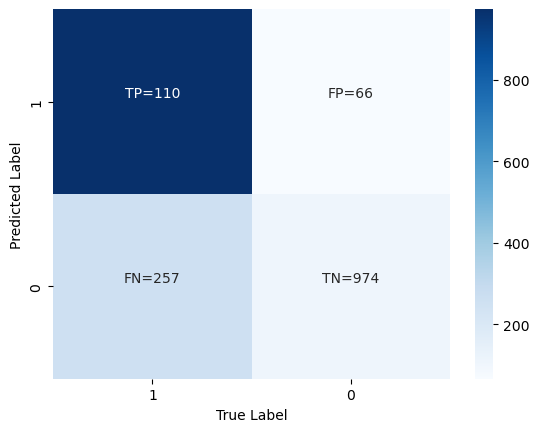

In [77]:
model_evaluation(classifier_lgbm, X_test, y_test)

<h3>
<div style="padding:20px;
            color:white;
            margin:10px;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">
    <span style='color:#CDA63A'>|</span> Hyperparameters Tunning </div></h3>

In [78]:
def optimize_lgbm_cs(x_train, y_train, n_trials=100, cv=5):
    
    def objective(trial):
        params = {
            'objective': 'binary',
            'metric': 'auc',
            'bosting_type': 'gbdt',
            'random_state': SEED,
            'lambda_l1': trial.suggest_float('lambda_l1', 0, 1),
            'lambda_l2': trial.suggest_float('lambda_l2', 0, 1),
            'num_leaves': trial.suggest_int('num_leaves', 2, 256),
            'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
            'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
            'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
            'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
            'class_weight': {0: trial.suggest_float('w0', 0, 10.0), 
                             1: trial.suggest_float('w1', 0, 10.0)},
        }
        th = trial.suggest_float('th', 0.4, 0.6)
        
        # Define the SVC model
        model = LGBMClassifier(**params, verbose=-100)


        # Define the cross-validation splits
        kf = KFold(n_splits=cv, shuffle=True, random_state=SEED)


        # Train and evaluate the model for each cross-validation split with SMOTE
        roc_auc_scores = []
        for i, (train_idx, val_idx) in enumerate(kf.split(x_train)):
            x_train_cv, y_train_cv = x_train.iloc[train_idx], y_train[train_idx]
            x_val_cv, y_val_cv = x_train.iloc[val_idx], y_train[val_idx]

            y_val_pred_proba = model_train(model,x_train_cv, y_train_cv, x_val_cv, y_val_cv, smote=False, info=False)

            y_val_pred = (y_val_pred_proba >= th).astype(int)
            roc_auc = roc_auc_score(y_val_cv, y_val_pred)

            roc_auc_scores.append(roc_auc)

        roc_auc = np.mean(roc_auc)

        return roc_auc


    # Define the Optuna study and optimize the objective function
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)

    # Get the best hyperparameters and F1 score
    best_params = study.best_params
    best_f1 = study.best_value

    model = LGBMClassifier(
        objective='binary',
        metric='auc',
        verbose = -100,
        boosting_type = 'gbdt',
        lambda_l1 = best_params['lambda_l1'],
        lambda_l2 = best_params['lambda_l2'],
        num_leaves = best_params['num_leaves'],
        feature_fraction = best_params['feature_fraction'],
        bagging_fraction = best_params['bagging_fraction'],
        bagging_freq = best_params['bagging_freq'],
        min_child_samples = best_params['min_child_samples'],
        class_weight = {0: best_params["w0"],
                        1: best_params["w1"]},
    )
    
    return model, best_params["th"]

In [79]:
%%capture
opti_lgbm_cs, th = optimize_lgbm_cs(X_train, y_train, n_trials=100)

[I 2023-05-30 20:19:14,014] A new study created in memory with name: no-name-26c023c6-79b3-4eec-b775-971cbae4b5f8
[I 2023-05-30 20:19:14,615] Trial 0 finished with value: 0.7547330270708483 and parameters: {'lambda_l1': 0.904141916884648, 'lambda_l2': 0.17485675441980675, 'num_leaves': 35, 'feature_fraction': 0.7807188630080157, 'bagging_fraction': 0.5889877527465531, 'bagging_freq': 1, 'min_child_samples': 70, 'w0': 3.3144189754780875, 'w1': 7.785453606522694, 'th': 0.40916486312882605}. Best is trial 0 with value: 0.7547330270708483.
[I 2023-05-30 20:19:15,098] Trial 1 finished with value: 0.6818758047338219 and parameters: {'lambda_l1': 0.3661880712276252, 'lambda_l2': 0.17858316887348624, 'num_leaves': 204, 'feature_fraction': 0.7201099341073753, 'bagging_fraction': 0.6799672233933272, 'bagging_freq': 4, 'min_child_samples': 71, 'w0': 6.8423133564444285, 'w1': 5.243861524364286, 'th': 0.5645574005550316}. Best is trial 0 with value: 0.7547330270708483.
[I 2023-05-30 20:19:15,845] T

In [80]:
opti_lgbm_cs, th

(LGBMClassifier(bagging_fraction=0.7983701397041048, bagging_freq=7,
                class_weight={0: 2.055175339809209, 1: 5.106555652604578},
                feature_fraction=0.7334771443771645,
                lambda_l1=0.9102768638165213, lambda_l2=0.5106723735829546,
                metric='auc', min_child_samples=88, num_leaves=6,
                objective='binary', verbose=-100),
 0.539140668105638)

[LightGBM] [Warning] bagging_fraction is set=0.7983701397041048, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7983701397041048
[LightGBM] [Warning] feature_fraction is set=0.7334771443771645, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7334771443771645
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.5106723735829546, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5106723735829546
[LightGBM] [Warning] lambda_l1 is set=0.9102768638165213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9102768638165213
Accuracy Score :  73.63%
ROC_AUC Score :  73.44%


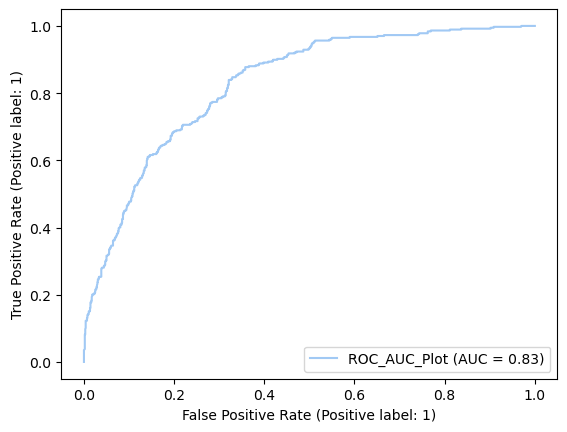

In [81]:
_ = model_train(opti_lgbm_cs,X_train, y_train, X_test, y_test, smote=False)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1040
           1       0.57      0.48      0.52       367

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



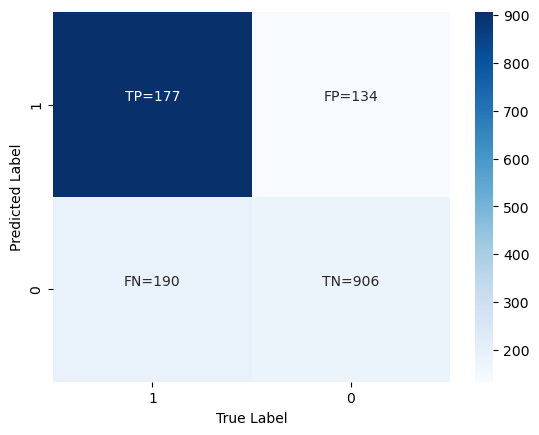

In [82]:
model_evaluation(opti_lgbm_cs, X_test, y_test, threshold=th)

## Summary

- Resampling : Higher percision
- Cost-Sensitive Learning : Higher recall

- The decision will depend on company budget. If it high focusing on recall is better. However, if company on has a few buget, choosing model wiht higher percision will be more precise.

<h1>
<div style="padding:20px;
            color:white;
            margin:10px;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">
    <span style='color:#CDA63A'>|</span>Conclusion</div></h1>
In conclusion, our project aimed to address the issue of customer churn by developing a machine learning model that can accurately predict which customers are likely to churn. We used the Telco Customer Churn dataset and evaluated the performance of LightGBM and Random Forest models based on the f1 and auc metrics, given the imbalance in the dataset. Our models showed good performance in identifying class 0, but struggled to capture the characteristics of class 1, indicating a need for more data, particularly for the minority class.

Despite this limitation, we were able to develop two optimized models with varying trade-offs between precision and recall. The first model has higher precision, which could be suitable for companies with a limited budget as it reduces the cost of incorrect predictions. The second model has higher recall, which could be beneficial for companies with a higher budget as it increases the likelihood of identifying customers who are likely to churn.

